##08.PyTorch Paper Replicating

In this project, we're going to be replicating a machine learning research paper and creating a Vision Transformer (ViT) from scratch using PyTorch.

We'll then see how ViT, a state-of-the-art computer vision architecure, performs on our FoodVision Mini problem.

##What is paper replicating?

It's no secret that machine learning is advancing fast.

Many of these advancements get published in machine learning research papers.

And the goal of paper replicating is to replicate these advances with code so you can use the techniques for your own problem.

For example, let's say a new model architecture gets released that performs better than any other architecure before on various benchmarks, wouldn't it be nice to try that architecture on your own problems?

*Machine leanring paper replicating involves turning a machine learning paper comprised of images/diagrams, math and text into usuable code and in our case, usable PyTorch code.*

##What is a machine learning research paper?

A machine learning research paper is a scientific paper that details findings of a research group on a specific area.


##Why replicate a machine learning research paper?

A machine learning reseaarch paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed into a few pages of text.

And if these experiments lead to  better results in an area related to the problem you're working on, it'd be nice to check them out.

Also replicating the work of others is a fantastic way to pratice your skills.

##What we're going to cover

Rather than talk about replicating a paper, we're going to get hands-on and actually replicate a paper.

The process for replicating all papers will be slightly diferent but by seeing what it's like to do one, we'll get the momentum to do more.

More specifically, we're going to be replicating the machine learning research paper `An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale`(Vit paper) with PyTorch.

The transformer neural network architecure was originally introduced in the machine learning research paper `Attention is all you need`.

And the original transformer architecture was designed to work on one-dimensional(1D) sequences of text.

A **Transformer architecture** is generally considered to be any neural network that uses the **attention mechansim** as it's primary learning layer. Similar to how a convolutional neural network (CNN) uses convolutions as it's primary learning layer.

Like the name suggests, **the Vision Transformer (ViT) architecture was designed to adapt the original Transformer architecture to vision problem(s)** (classification being the first and since many other have followed).

The original Vision Transformer has been through several iterations over the past couple of years, however, we're going to focus on replicating the original, otherwise known as the "vanila Vision Transformer". Because if you can recreate the original, you can adapt to the others.

We're going to be focusing on building the ViT architecture as per original ViT paper and applying it to FoodVision Mini.

>Note: Despite the fact we're going to be focused on replicating the ViT paper, avoid getting too bogged down on a particular paper as newer better methods will often come along, quickly, so the skill should be to remain curious whilst building the fundamental skills of turning math and words on a page into working code.

##0.Getting Setup

As we've done previously, let's make sure we've got all of the modules we'll need for this section.

We'll import the Python scripts (such as `data_setup.py` and `engine.py`) we created in 05.Pytorch Going Modular.

To do so, we'll download `going_modular` directory from the `pytorch-deep-learning` repository (if we don't already have it).

We'll also get the `torchinfo` package if it's not available.
`torchifo` will help later to give us a visual representation of our model.

And since later on we'll be using `torchvision`, we'll make sure we've got the latest version.

In [2]:
import torch
import torchvision
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


Now we'll continue with the regular imports, setting up device agnostic code and this time we'll also get the `helper_functions.py` script from GitHub.

The `helper_functions.py` script contains several functions we created in the previous sections:
* `set_seeds()` to set the random seeds (created in 07.PyTorch Experiment Tracking section 0).

* `download_data()` to download a data source given a link (created in 07.PyTorch Experiment Tracking section 1).

* `plot_loss_curves()` to inspect our model's training results (created in 04.PyTorch Custom Datasets section 7.8)

>Note: It may be a better idea for many of the functions in the `helper_functions.py` script to be merged into `going_modular/going_modular/utils.py`, perphas that's an extension you'd like to try.

In [3]:
# Continue with reqular imports

import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
  from torchinfo import summary
except:
  print("[INFO] Couldn't find torchinfo...installing it.")
  !pip install -q torchinfo
  from torchinfo import summary


# Try to import going_modular directory, download it from GitHub if it doesn't work
try:
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves
except:
  # Get the going_modular scripts
  print("[INFO] Couldn't find going_modular or helper_functions scripts...downloading them from GitHub.")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo...installing it.
[INFO] Couldn't find going_modular or helper_functions scripts...downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4356, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 4356 (delta 213), reused 252 (delta 176), pack-reused 4035 (from 1)
Receiving objects: 100% (4356/4356), 654.51 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (2584/2584), done.
Updating files: 100% (248/248), done.


##1.Get Data

Since we're continuing on with FoodVision Mini, let's download the pizza, steak and sushi image dataset we've been using.

To do so we can use the `download_data()` funciton from `helper_funcitons.py` that we created in 07.PyTorch Experiment Tracking section 1.

We'll `source` to the raw GitHub link of the `pizza_steak_sushi.zip` data and the `destination` to `  `pizza_steak_sushi`.

In [4]:
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")

image_path

[INFO] Did not find data/pizza_steak_sushi directory, creating one...
[INFO] Downloading pizza_steak_sushi.zip from https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip...
[INFO] Unzipping pizza_steak_sushi.zip data...


PosixPath('data/pizza_steak_sushi')

Beautiful! Data downloaded, let's setup the training and test directories.

In [5]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

##2.Create Datasets and DataLoaders

Now we've got some data, let's now turn it into `DataLoader's`.

To do so we can use the `create_dataloaders()` function in `data_setup.py`.

First, we'll create a transform to prepare our images.

This where one of the first references to the ViT paper will come in.

In Table 3, the training resolution is mentioned as being 224(height=224, width=224).

We'll be training our model from scratch (no transfer learning to begin with), we won't provide a `normalize` transform like we did in 06.PyTorch Transfer Learning section 2.1.


###2.1 Prepare transforms for images


In [6]:
# Create image size (from Table 3 in the ViT paper)

IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
  transforms.Resize((IMG_SIZE, IMG_SIZE)),
  transforms.ToTensor(),
])

print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


###2.2 Turn images into `DataLoader`'s

Transforms created!

Let's now created our `DataLoader`'s.

The ViT paper states the use of batch size of 4096 which is 128x the size of the batch size we've been (32).

However, we're going to stick with a batch size of 32.

Why?

Because some hardware (including the free teir of Google Colab) may not be able to handle a batch size of 4096.

Having a batch size of 4096 means that 4096 images need to fit into the GPU memory at a time.

This works when you've got the hardware to handle it like a research team from Google often does but when you're running on a single GPU (Such as using Google Colab), making sure things work with smaller batch size first is a good idea.

An extension of this project could be try a higher batch size value and see what happens.

>Note: We're using the `pin_memory=True` parameter in the `create_dataloaders()` function to speed up computation. `pin_memory=True` avoids unnecessary copying of memory between the CPU and GPU memory by "pinning" examples that been seen before. Though the benefits of this will likely be seen with larger dataset sizes (our FoodVision Mini dataset is quite small). However, setting `pin_memory=True` doesn't always improve performance (this is another one of those wired scenarios in machine learning where some things work sometimes and don't other times), so best to experiment, experiment, experiment. See the PyTorch `torch.utils.data.DataLoader` documentation or `Making Deep Learning Go Brrr from First Principles` by Horace He for more.

In [7]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper it's because we're starting small

# Create data loaders

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
  train_dir=train_dir,
  test_dir=test_dir,
  transform=manual_transforms,
  batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7ccdcce630a0>,
 ['pizza', 'steak', 'sushi'])

###2.3 Visualize a single image

Now we've loaded our data, let's visualize, visualize, visualize!

An important step in the ViT paper is preparing the images into patches.

We'll get to what this means in section 4 but for now, let's view a single image and its label.

To do so, let's get a single image and label from a batch of data and inspect their shapes.

In [8]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(2))

Wonderful!

Now let's plot the image and its label with `matplotlib`.

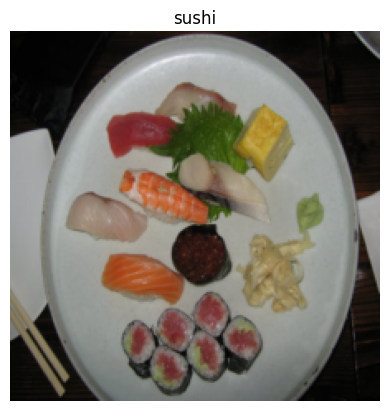

In [9]:
# Plot image with matplotlib
plt.imshow(image.permute(1,2,0)) # rearrange image dimensions to suit matplotlib [color_channels, height,width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

Nice!

Looks like our images are importing correctly, let's continue with the paper replication.

##3.Replicating the ViT paper: an overview

Before we write any more code, let's discuss what we're doing.

We'd like to replicate the ViT paper for our own problem, FoodVision Mini.

So our model inputs are: images of pizza, steak and sushi.

And our ideal model outputs are: predicted labels of pizza, steak or sushi.

No different to what we've been doing throughout the previous sections.

The question is: how do we go from our inputs to the desired outputs?



###3.1 Inputs and outputs, layers and blocks

ViT is a deep learning neural network architecture.

And any nueral network architecture is generally comprised of **layers**.

And a collection of layers is often referred to as a **block**.

And stacking many blocks together is what gives us the whole architecture.

A **layer** takes an input (say an image tensor), performs some kind of function on it (for example what's in the layer's `forward()` method) and then returns an output.

So if a **single layer** takes an input and gives an output, then a collection of layers or a **block** also takes an input and gives an output.

Let'a make this concrete:
* **Layer** - takes an input,performs a function on it, returns an output.

* **Block** - a collection of layers, takes an input,performs a series of functions on it, returns an output.

* **Architecure(or model)** - a collection of blocks, takes an input, performs a series of functions on it, returns an output.

This ideology is what we're going to be using to replicate the ViT paper.

We're going to take it layer by layer, block by block, function putting the pieces of the puzzle together like Lego to get our desired overall architecture.

The reason we do this is because looking at a whole research paper can be intimidating.

So for a better understanding, we'll break it down, starting with the inputs and outputs of single layer and working up to the inputs and outputs of the whole model.

*A modern deep learning architecture is usually collection of layers and blocks. Where layers take an input (data as a numerical representation) and manipulate it using some kind of function (for example, the self-attention formula , however, this function could be almost anything) and then output it. Blocks are generally stacks of layers on top of each other doing a similar thing to a single layer but multiple times.*

###3.2 Getting specific: What's ViT made of?

There are many little details about the ViT model sprinkled throughout the paper.

Finding them all is like one big treasure hunt!

Remember, a research paper is often months of work compressed into a few pages so it's understandable for it to take of practice to replicate.

However, the main three resources we'll be looking at for the architecture design are:
1. **Figure 1** - This gives an overview of the model in a graphical sense, you could almost recreate the architecture with this figure alone.

2. **Four equations in section 3.1** - These equations give a little bit more of a mathematical grounding to the coloured blocks in Figure 1.

3. **Table 1** - This table shows the various hyperparameter settings(such as number of layers and number of hidden units) for different ViT models variants. We'll  be focused on the smallest version, ViT-Base.


###3.2.1 Exploring File 1

Let's start by going through Figure 1 of the ViT Paper.

The main things we'll be paying attention to are:
1. **Layers** - takens an **input**, performs an operation or function on the input, produces an **output**.

2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**.

The ViT architecture is comprised of several stages:

* **Patch + Position Embedding(inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.

* **Linear projection of flattened patches (Embeddedd Patches)** - The image patched get turned into an **embedding**, the benefit of using an embedding rather than just the image values is that an embedding is a *learnable* representation (typically in the form of a vector) of the image that can improve with training.

* **Norm** - This is for "Layer Normalization" or "Layer Norm",  a technique for regularizing (reducing overfitting) a neural network, you can use LayerNorm via the PyTorch layer `torch.nn.LayerNorm()`.

* **Multi-Head Attention** - This is a Multi-Head Self-Attention Layer or "MSA" for short. You can create am MSA layer with the PyTorch layer `torch.nn.MultiheadAttention()`.

* **MLP or (Multilayer perceptron) ** - A MLP can often refer to any collection of feedforward layers(or in PyTorch's case a collection of layers with a `forward()` method). In the ViT Paper, the authors refer to the MLP as "MLP block" and it contains two `torch.nn.Linear()` layers with a `torch.nn.GELU()` non-linearity activation in between them (section 3.1) and a `torch.nn.Dropout()` layer after each (Appendix B.1).

* **Transformer Encoder** - The Transformer Encoder, is a collection of layers listed above. There are two skip connections inside the Transformer encoder (the "+" symbols) meaning the layer's inputs are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transformer ecncoders stacked on top of each other.

* **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class output. Since we're working on the image classification, you could also call this the "classifier head". The structure of the MLP Head is similar to the MLP block.

You might notice that many of the pieces of the ViT architecture can be created with existing PyTorch layers.

This is because of how PyTorch is designed, it's one of the main purposes of PyTorch to create resuable neural network layers for both researchers and machine learning practitioners.



###3.2.2 Exploring the Four Equations

The next main part(s) of the ViT paper we're going to look at are the four equations in section 3.1.

\begin{aligned}
\mathbf{z}_0 & =\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_p^1 \mathbf{E} ; \mathbf{x}_p^2 \mathbf{E} ; \cdots ; \mathbf{x}_p^N \mathbf{E}\right]+\mathbf{E}_{p o s}, & & \mathbf{E} \in \mathbb{R}^{\left(P^2 \cdot C\right) \times D}, \mathbf{E}_{p o s} \in \mathbb{R}^{(N+1) \times D} \\
\mathbf{z}_{\ell}^{\prime} & =\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \\
\mathbf{z}_{\ell} & =\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\
\mathbf{y} & =\operatorname{LN}\left(\mathbf{z}_L^0\right) & &
\end{aligned}

**Equation number and Description from ViT paper section 3.1**

* Equation 1
  
  The Transformer uses constant latent vector size $D$ through all of it's layers, so we flatten the patches and map to $D$ dimensions with a a **trainable linear projection** (Eq. 1). We refer to the output of this projection as the **patch embeddings...Position embeddings** are added to the patch embeddings to retain positional information. We use standard **learnable 1D position embeddings**...


* Equation 2

  The transformer encoder (Vaswani et al.,2017) consists of alternating layers of multiheaded selfattention (MSA, see Appendix A) and MLP blocks (Eq.2.3).
  **Layernorm (LN) is applied before every block**, and **residual connections after every block**(Wang et al. 2019; Baevski & Auli, 2019).

* Equation 3

  Same as equation 2

* Equation 4

  Similar to BERT's [class] token, we **prepend a learnable embedding to the sequence of embedded patches** $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text{class}}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq.4)....


Let's map these descriptions to the ViT architecture in Figure 1.

Connecting Figure 1 from the ViT paper to four equations from section 3.1 describing the math behind each of the layers/blocks.

How about we break down each equation further (it will be our goal to recreate these with code)?

In all equations (except equation 4), "$\mathbf{z}$" is the raw output of a particular layer:

1. $\mathbf{z}_{0}$ is "z zero" (this is the output of the initial patch embedding layer).
2. $\mathbf{z}_{\ell}^{\prime}$ is "z of a particular layer prime" (or an intermediary value of z).
3. $\mathbf{z}_{\ell}$ is "z of a particular layer".


And $\mathbf{y}$ is the overall output of the architecture.

###3.2.3 Equation 1 overview

$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

This equation deals with the class token, patch embedding and position embedding ($\mathbf{E}$ is for embedding) of the input image.

In vector form, the embedding might look something like:

```
  x_input = [class_token, image_patch_1, image_patch_2, image_patch_3, ...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position,...]
```

Where each of the elements in the vector is learnable (their `requires_grad=True`).

###3.2.4 Equation 2 overview

$$ \begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's a Multi-Head Attention layer (MSA) wrapping a LayerNorm layer (LN).

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer the "MLP block".

In pseudocode, this might look like:

```
x_output_MLP_block = MLP_Layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block

```

Notice the skip connection on the end (adding the input of the layers to the output of the layers).

###3.2.5 Equation 3 overview

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\ \end{aligned} $$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's also a Multilayer Perceptron layer (MLP) wrapping a LayerNorm layer (LN).

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer the "MLP block".

In pseudocode, this might look like:

```
lock = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_block
```

Notice the skip connection on the end(adding the input of layers to the output of the layers).

###3.2.6 Equation 4 overview

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\ \end{aligned} $$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's also a Multilayer Perceptron layer (MLP) wrapping a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block`:

```
y = Linear_layer(LN_Layer(x_output_MLP_block[0]))
```

Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

>Note: The above section covers alot of information. But don't forget if something doesn't make sense, you can always research it further. By asking questions like "What is a residual connection?".

###3.2.7 Exploring Table 1

The final piece of the ViT architecture puzzle we'll focus on (for now) is Table 1.

This table showcasing the various hyperparameters of each of the ViT architectures.

You can see the numbers gradually increase from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base (start small and scale up when neccessary) but we'll be writting code that could easily scale up to larger variants.

Breaking the hyperparameters down:

* **Layers** - How many Transformer Encoder blocks are there? (each of these will contain a MSA block and MLP block)

* **Hidden size $D$** - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better the results. However, a larger embedding comes at the cost of more computation.

* **MLP size** - What are the number of hidden units in the MLP layers?

* **Heads** - How many heads are there in the Multi-Head Attention layers?

* **Params** - What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more computation. You'll notice even ViT-Base has far more parameters than any other model we've used so far.


We'll use these values as the hyperparameters settings for out ViT architecture.

###3.3 My Workflow for replicating papers

When I start working on replicating a paper, I go through the following steps:

1. Read the whole paper end-to-end once (to get an idea of the main concepts).

2. Go back through each section and see how they line up with each other and start thinking about how they might be turned into code(just like above).

3. Repeat step 2 until I've got a fairly good outline.

4. Use mathpix.com (a very handy tool) to turn any sections of the paper into markdown/LaTeX to put into notebooks.

5. Replicate the simplest version of the model possible.

6. If I get stuck, look up other examples.

We've already gone through the first few steps above (and if you haven't read the full paper yet, I'd encourage you to give it a go) but what we'll be focusing on next is step 5: replicating the simplest version of the model possible.

This is why we're starting with ViT-Base.

Replicating the smallest version of the architecture possible, get it working and then we scale up if we wanted to.

>Note: If you've never read a research paper before, many of the above steps can be intimidating. But don't worry, like anything, your skills at reading and replicating papers will improve with practice. Don't forget, a research paper is often months of work by many people compressed into a few papers. So trying to replicate it on your own is no small feat.

##4.Equation 1: Split data into patches and creating the class, position and patch embedding

I remember one of my machine learning engineer friends used to say "it's all about the embedding."

As in, if you can represent your data in a good, learnable way (as **embeddings are learnable representations**), chances are, a learning algorithm will be able to perform well on them.

With that being said, let's start by creating the class, position and patch embeddings for the ViT architecture.

We'll start with the **patch embedding**.

This means we'll be turning our input images in a sequence of patches and then embedding those patches.

Recall that an **embedding** is a learnable representation of some from and is often a vector.

The term learnable is important because this means the numerical representation of an input image (that the model sees) can be improved over time.

We'll begin by the following the opening paragraph of section 3.1 of the ViT paper.

>The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the patch embeddings.


And since we're dealing with image shapes, let's keep in mind the line from Table 3 of the ViT paper:

>Training resolution is 224

Let's break down the text above.

* $D$ is the size of the patch embeddings, different values for $D$ for various sized ViT models can be found in Table 1.


* The image starts as 2D with size ${H \times W \times C}$.
  * $(H, W)$ is the resolution of the original image (height, width).

  * $C$ is the number of channels.

* The image gets converted to a sequence of flattened 2D patches with size ${N \times\left(P^{2} \cdot C\right)}$.

  * $(P, P)$ is the resolution of each image patch (patch size).
  * $N=H W / P^{2}$ is the resulting number of patches, which also serves as the input sequence length for the Transformer.


###4.1 Calculating patch embedding input and output shapes by hand

How about we start by calculating these input and output shape values by hand?

To do so, let's create some variables to mimic each of the terms (such as $H$, $W$ etc) above.

We'll use a patch embedding size ($P$) of 16 since it's the best performing version of the ViT-Base uses (see column "ViT-B/16" of Table 5 in the ViT paper for more).

In [10]:
# Create example values

height = 224  # H ("The training resolution is 224.")
width = 224 # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch_size (P={patch_size}): {number_of_patches}")

Number of patches (N) with image height (H=224), width (W=224) and patch_size (P=16): 196


We've got the number of patches, how about we create the image output size as well?

Better yet, let's replicate teh input and output shapes of the patch embedding layer.

Recall:
  * **Input**: The image starts as a 2D with size ${H\times W\times C}$

  * **Output**: The image gets converted to a sequence of flattened 2D patches with size ${N\times \left(P^{2}\cdot C\right)}$.

In [11]:
# Input shape (this is the size of a single image)
embedding_layer_input_shape = (height, width, color_channels)

# Output Shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


Input and output shapes acquired!

###4.2 Turning a single image into patches

Now we know the ideal input and output shapes for our **patch embeddding** layer, let's move towards making it.

What we're doing is breaking down the overall architecture into smaller pieces, focusing on the inputs and outputs of individual layers.

So how do we create the patch embedding layer?

We'll get to that shortly, first, let's visualize, visualize, visualize! what it looks like to turn an image into patches.

Let's start with our single image.


(-0.5, 223.5, 223.5, -0.5)

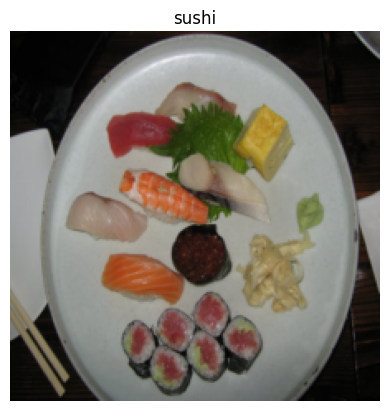

In [12]:
# View single image
plt.imshow(image.permute(1,2,0))  # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False)

We want to turn this image into patches of itself inline with Figure 1 of the ViT paper.

How about we start by visualizing the top row of patched pixels?

We can do this by indexing on the different image dimensions.

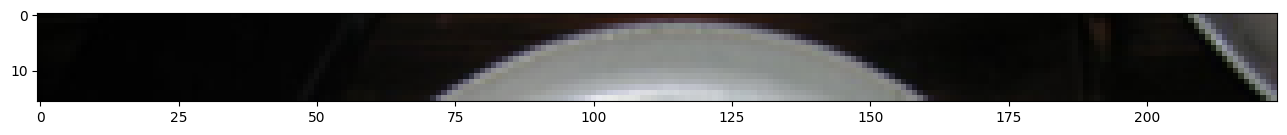

In [13]:
# Change image shape to be compartible with matplotlib (color_channels, height, width) -> (height, width, color_channells)
image_permuted = image.permute(1,2,0)

# Index to plot the top row of the patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :])

Now we've got the top row, let's turn it into patches.

We can do this by iterating through the number of patches there'd be in the top row.

Number of patches per row: 14.0
Patch size: 16 x 16 pixels


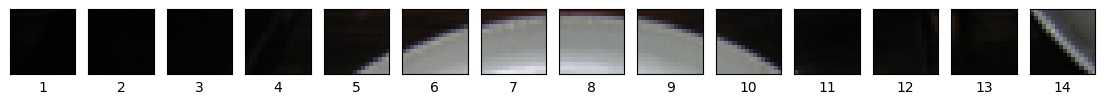

In [14]:
# Setup hyperparameters and make sure img_size and patch_size are compartible
img_size = 224
patch_size = 16
number_of_patches = img_size/patch_size

assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {number_of_patches}\nPatch size: {patch_size} x {patch_size} pixels")


# Create a series of subplots
fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size,  # one column for each patch
                        figsize=(number_of_patches, number_of_patches),
                        sharex=True,
                        sharey=True)

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
  axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :])  # Keep height index constant, alter the width index
  axs[i].set_xlabel(i+1)  # set the label
  axs[i].set_xticks([])
  axs[i].set_yticks([])

Those are some nice looking patches!

How about we do it for the whole image?

This time we'll iterate through the indexes for height and width and plot each patch as it's own subplot.

Number of patches per row: 14.0      
Number of patches per colum: 14.0      
Total patches: 196.0      
Patch size: 16 pixels x 16 pixels


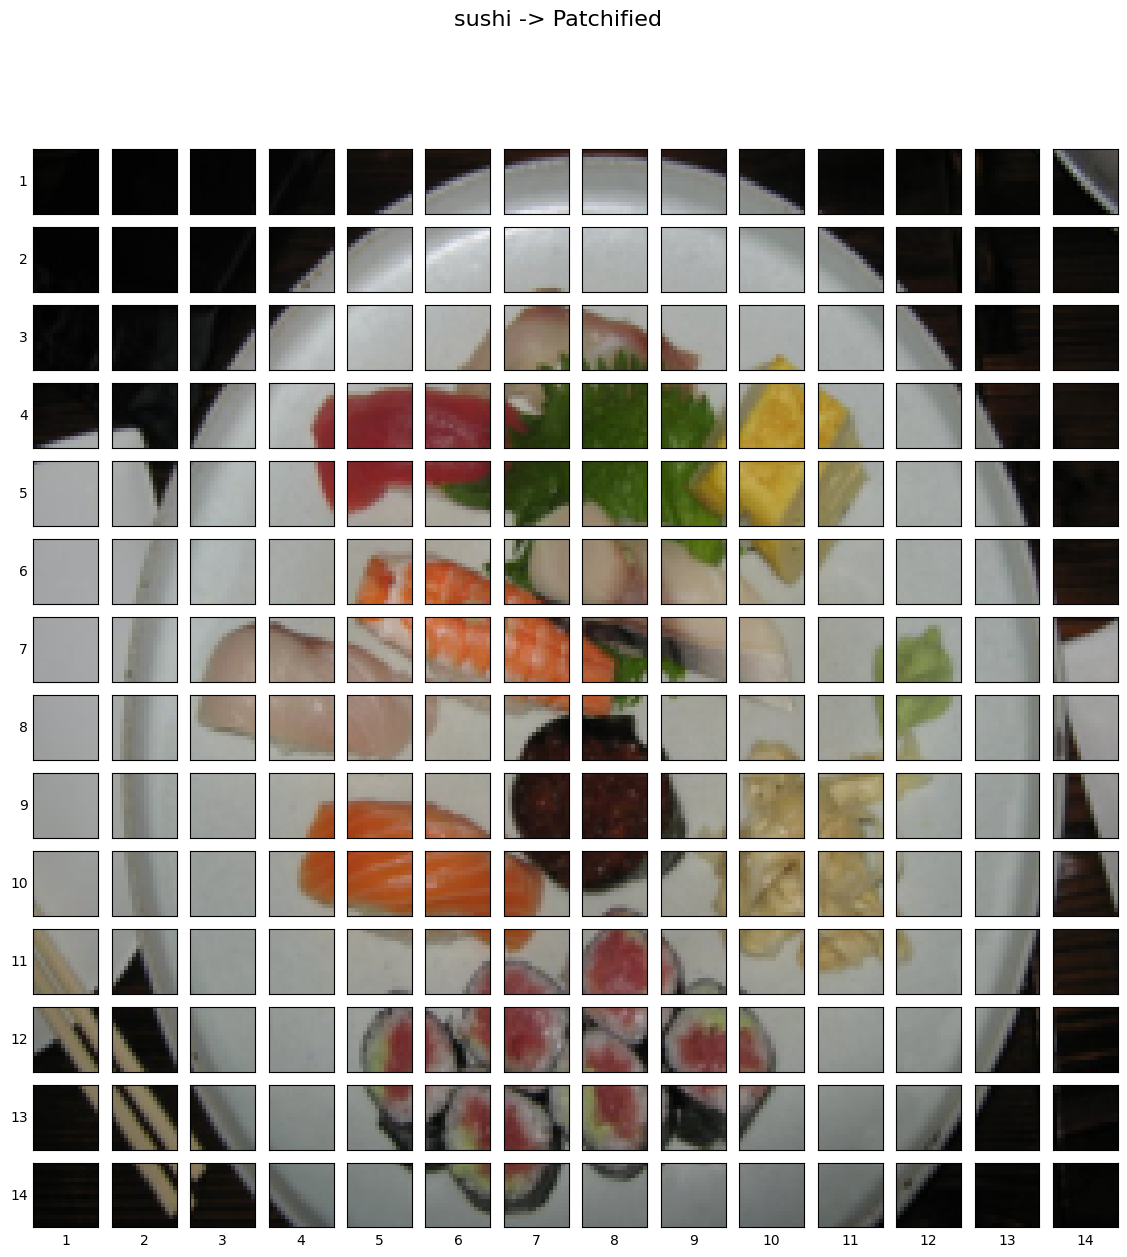

In [15]:
# Setupp hyperparameters and make sure img_size and patch_size are compartible
img_size = 224
patch_size = 16
num_patches = img_size/patch_size

assert img_size % patch_size == 0, "Image must be divisible by patch_size"
print(f"Number of patches per row: {num_patches}\
      \nNumber of patches per colum: {num_patches}\
      \nTotal patches: {num_patches*num_patches}\
      \nPatch size: {patch_size} pixels x {patch_size} pixels")


# Create a series of subplots
fig ,axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)


# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)):  # iterate through height
  for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

    # Plot the permuted image patch (image_permuted -> (Height, Width, Color_channels))
    axs[i,j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                   patch_width:patch_width+patch_size, # iterate through width
                                   :]) # get all color channels

    # Set up label information, remove the ticks for clarity and set labels to outside
    axs[i,j].set_ylabel(i+1,
                        rotation="horizontal",
                        horizontalalignment="right",
                        verticalalignment="center")

    axs[i, j].set_xlabel(j+1)
    axs[i, j].set_xticks([])
    axs[i ,j].set_yticks([])
    axs[i, j].label_outer()


# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()


Image patchified!

Woah, that looks cool.

Now how do we turn each of these patches into an embedding and convert them into a sequence?

Hint: We can use PyTorch layers. Can you guess which?

###4.3 Creating image patches with `torch.nn.Conv2d()`

We've seen what an image looks like when it gets turned into patches, now let'start moving towards replicating the patch embedding layers with PyTorch.

To visualize our single image we wrote code to loop through the different height and width dimensions of a single image and plot individual patches.

This operation is very similar to the convolutional operation we saw in 03.PyTorch Computer Vision section 7.1: Stepping through `nn.Conv2d()`.

In fact, the authors of the ViT paper mention in section 3.1 that the patch embedding is achievable with a convolutional neural network (CNN):

>Hybrid Architecture. As an alternative to raw image patches, the input sequence can be formed from feature maps of a CNN (LeCun et al., 1989). In this hybrid model, the patch embedding projection $\mathbf{E}$ (Eq. 1) is applied to patches extracted from a **CNN feature map**. As a special case, the patches can have spatial size $1 \times 1$, which means that the **input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension**. The classification input embedding and position embeddings are added as described above.


The "**feature map**" they're referring to are the weights/activations produced by a convolutional layer passing over a given image.

*By setting the `kernel_size` and `stride` parameters of a `torch.nn.Conv2d()` layer equal to the `patch_size` , we can effectively get a layer that splits our image into patches and creates a learnable embedding (referred to as a "Linear Projection" in the Vit paper) of each patch*.

Remember our ideal input and output shapes for the patch embedding layer?

* **Input**: The image starts as 2D with size $H\times W\times C$.

* **Output**: The image gets converted to a 1D sequence of flattened 2D patches with size ${N\times\left(P^{2}\cdot C\right)}$.

Or for an image size of 224 and patch size of 16:

* **Input(2D image)**: (224, 224, 3) -> (height, width, color channels)

* **Output(flattened 2D patches)**: (196, 768) -> (number of patches, embedding dimension)

We can recreate these with:

* `torch.nn.Conv2d()` for turning our image into patches of CNN feature maps.

* `torch.nn.Flattened()` for flattening the spatial dimensions of the feature map.

Let's start with the `torch.nn.Conv2d()` layer.

We can replicate the creation of patches by setting the `kernel_size` and `stride` equal to `patch_size`.

This means each convolutional kernel will be of size (`patch_size` x `patch_size`) or if `patch_size=16`, (`16x16`) (the equivalent of one whole patch).

And each step or `stride` of the convolutional kernel will be `patch_size` pixels long or `16` pixels long (equivalent of stepping to the next patch).

We'll set `in_channels=3` for the number of color channels in our image and we'll set `out_channels=768`, the same as the $D$ value in Table 1 for ViT-Base (this is the embedding dimension, each image will be embedded into a learnable vector of size 768).

In [16]:
from torch import nn

# set the patch size
patch_size = 16

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of colo channels
                   out_channels=768, # from Table 1: Hidden size D, this is the embedding size
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)


Now we've got a convolutional layer, let's see what happens when we pass a single image through it.

(-0.5, 223.5, 223.5, -0.5)

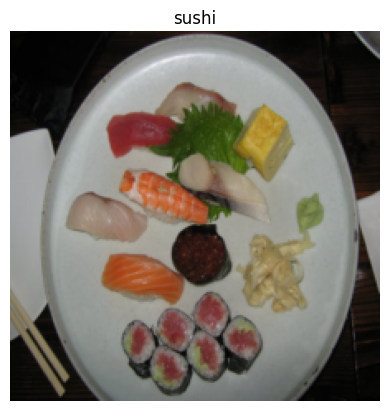

In [17]:
# View single image
plt.imshow(image.permute(1,2,0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False)

In [18]:
# Pass the image throuh the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0))  # add a single batchh dimension (height, width, color_channels) -> (batch, height, width, color_channels)
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Passing our image through the convolutional layer turns it into a series of 768 (this is the embedding size or $D$) feature/activation maps.

So its output shape can be read as:
```
torch.Size([1, 768, 14, 14]) -> [batch_size, embedding_dim, feature_map_height, feature_map_width]
```

Let's visualize five random feature maps and see what they look like.

Showing random convolutional feature maps from indexes: [535, 74, 373, 761, 680]


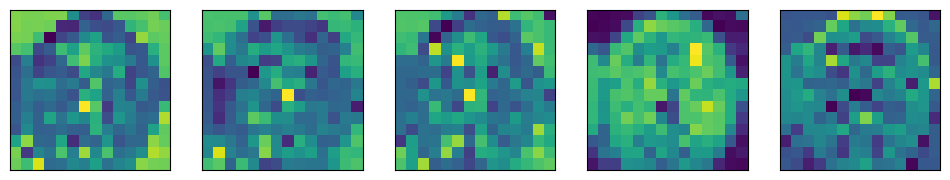

In [19]:
# Plot random 5 convolutional feature maps
import random

random_indexes = random.sample(range(0, 768), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
  image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of the convolutional layer
  axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
  axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

Notice how the feature maps all kind of represent the original image, after visualizing a few more you can start to see the different major outlines and some major features.

The important thing to note is that these features may change over time as the neural network learns.

And because of these, these feature maps can be considered a **learnable embedding** of our image.

Let's check one out in numerical form.

In [20]:
# Get a single feature map in tensor form

single_feature_map = image_out_of_conv[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[0.0219, 0.0264, 0.0252, 0.0299, 0.0523, 0.2607, 0.3758, 0.3357,
           0.3065, 0.1409, 0.0317, 0.0350, 0.0399, 0.0258],
          [0.0232, 0.0245, 0.0335, 0.0714, 0.3390, 0.3596, 0.2537, 0.2658,
           0.2789, 0.2817, 0.2170, 0.0706, 0.0386, 0.0295],
          [0.0434, 0.0498, 0.0521, 0.3059, 0.2744, 0.2815, 0.2310, 0.1702,
           0.2271, 0.2357, 0.2583, 0.2473, 0.0371, 0.0312],
          [0.0839, 0.0798, 0.2315, 0.2522, 0.0738, 0.1558, 0.0079, 0.0590,
           0.1242, 0.2176, 0.2098, 0.2610, 0.1656, 0.0426],
          [0.2680, 0.2899, 0.2719, 0.2489, 0.1972, 0.1429, 0.0957, 0.1015,
           0.1391, 0.2306, 0.2356, 0.2682, 0.1824, 0.0411],
          [0.2645, 0.2767, 0.2697, 0.2640, 0.2074, 0.2008, 0.1986, 0.2333,
           0.2727, 0.2529, 0.2599, 0.2573, 0.2304, 0.0764],
          [0.2641, 0.2395, 0.2136, 0.2043, 0.2463, 0.2740, 0.2810, 0.1594,
           0.1072, 0.2450, 0.2555, 0.1846, 0.2249, 0.4375],
          [0.2591, 0.2533, 0.2644, 0.2296, 0.2501, 0.26

The `grad_fn` output of the `single_feature_map` and the `requires_grad=True` attribute means PyTorch is tracking the gradients of this feature map and it will be updated by gradient descent during training.

###4.4 Flattening the patch embedding with `torch.nn.Flatten()`

We've turned our image into patch embeddings but they're still in 2D format.

How do we get them into the desired output shape of the patch embedding layer of the ViT model?

* **Desired output(1D sequence of flattened 2D patches)**: (196, 768) -> (number of patches, embedding dimension) -> ${N\times\left(P^{2}\cdot C\right)}$

Let's check the current shape.

In [21]:
# Current tensor shape
print(f"Current tensor shape: {image_out_of_conv.shape} -> [batch, embedding_dim, feature_map_height, feature_map_width]")

Current tensor shape: torch.Size([1, 768, 14, 14]) -> [batch, embedding_dim, feature_map_height, feature_map_width]


Well we've got the 768 part ($(P^{2}\cdot C$)) but we still need the number of patches ($N$).

Reading back through section 3.1 of the ViT paper it says
>As a special case, the patches can have spatial size $1\times 1$, which means that the **input sequence is obtained by simply flattening the spatial dimensions of the feature map and projecting to the Transformer dimension.**

Flattening the spatial dimensions of the feature map hey?

How about `torch.nn.Flatten()`?

But we don't want to flatten the whole tensor, we only want to flatten the "spatial dimensions of the feature map".

Which in our case is the `feature_map_height` and `feature_map_width` dimensions of `image_out_of_conv`.

So how about we create a `torch.nn.Flatten()` layer to only flatten those dimensions, we can use the `start_dim` and `end_dim` parameters to set that up?

In [22]:
# Create flatten layer
flatten = nn.Flatten(start_dim=2, # flatten feature_map_height(dimension 2)
                      end_dim=3)  # flatten feature_map_width (dimension 3)

Nice ! Now let's put it all together!

We'll:

1. Take a single image.

2. Put in through the convolutional layer (`conv2d`) to turn the image into 2D feature maps (patch embeddings).

3. Flatten the 2D feature map into a single sequence.

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


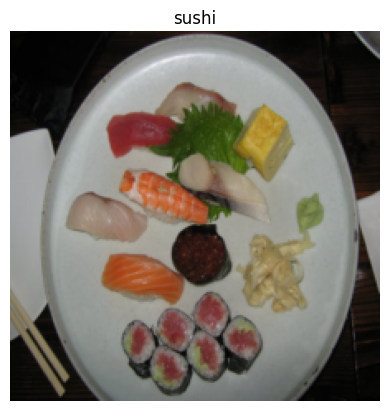

In [23]:
# 1. View single image
plt.imshow(image.permute(1,2,0))  # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False)
print(f"Original image shape: {image.shape}")


# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape: {image_out_of_conv.shape}")

# 3.Flatten the feature maps
image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")

Woohoo! it looks like our `image_out_of_conv_flattened` shape is very close to our desired output shape:

* **Desired output (flattened 2D patches)**: (196, 768) -> ${N\times\left(P^{2}\cdot C\right)}$

* **Current Shape**: (1, 768, 196)

The only difference is our current shape has a batch size and the dimensions are in different order to the desired output.

How could we fix this?

Well, how about we rearrange the dimensions?

We can do so with `torch.Tensor.permute()`just like we do when rearranging image tensors to plot them with matplotlib.

Let's try.

In [24]:
# Get flattened image patch embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0, 2, 1) # [batch_size, P^2*C, N] -> [batch_size, N, P^2*C]
print(f"Patch embedding sequeence shape: {image_out_of_conv_flattened_reshaped.shape} -> [batch_size, num_patches, embedding_size]")

Patch embedding sequeence shape: torch.Size([1, 196, 768]) -> [batch_size, num_patches, embedding_size]


Yes!!!

We've now matched the desired input and output shapes for the patch embedding layer of ViT architecture using a couple of PyTorch layers.

How about we visualize one of the flattened feature maps?

(-0.5, 195.5, 0.5, -0.5)

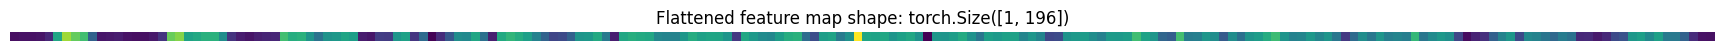

In [25]:
# Get a single flattened feature map
single_flattend_feature_map = image_out_of_conv_flattened_reshaped[:,:,0] # index: (batch_size, number_of_patches, embedding_dimensions)

# Plot the flattened feature map visually
plt.figure(figsize=(22, 22))
plt.imshow(single_flattend_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattend_feature_map.shape}")
plt.axis(False)

The flattened feature map doesn't look like much visually, but that's not what we're concerned about, this is what the output of the patching embedding layer and the input to the rest of the ViT architure will look like.

>**Note**:  The original Transformer architecture was designed to work with text. The Vision Transformer architecture (ViT) had the goal of using the original  Transformer for images. This is why the input to the ViT architecture is processed in the way it is. We're essentially taking a 2D image and formatting it to appear as a 1D sequence if text.

How about we view the flattened feature map in tensor form?

In [26]:
# See flattened feature map as a tensor
single_flattend_feature_map , single_flattend_feature_map.requires_grad

(tensor([[0.0219, 0.0264, 0.0252, 0.0299, 0.0523, 0.2607, 0.3758, 0.3357, 0.3065,
          0.1409, 0.0317, 0.0350, 0.0399, 0.0258, 0.0232, 0.0245, 0.0335, 0.0714,
          0.3390, 0.3596, 0.2537, 0.2658, 0.2789, 0.2817, 0.2170, 0.0706, 0.0386,
          0.0295, 0.0434, 0.0498, 0.0521, 0.3059, 0.2744, 0.2815, 0.2310, 0.1702,
          0.2271, 0.2357, 0.2583, 0.2473, 0.0371, 0.0312, 0.0839, 0.0798, 0.2315,
          0.2522, 0.0738, 0.1558, 0.0079, 0.0590, 0.1242, 0.2176, 0.2098, 0.2610,
          0.1656, 0.0426, 0.2680, 0.2899, 0.2719, 0.2489, 0.1972, 0.1429, 0.0957,
          0.1015, 0.1391, 0.2306, 0.2356, 0.2682, 0.1824, 0.0411, 0.2645, 0.2767,
          0.2697, 0.2640, 0.2074, 0.2008, 0.1986, 0.2333, 0.2727, 0.2529, 0.2599,
          0.2573, 0.2304, 0.0764, 0.2641, 0.2395, 0.2136, 0.2043, 0.2463, 0.2740,
          0.2810, 0.1594, 0.1072, 0.2450, 0.2555, 0.1846, 0.2249, 0.4375, 0.2591,
          0.2533, 0.2644, 0.2296, 0.2501, 0.2645, 0.2259, 0.0047, 0.2333, 0.2301,
          0.2458

Beautiful!

We've turned our single 2D image into a 1D learnable embedding vector (or "Linear Projection of Flattened Patches" in Figure 1 of the ViT paper).

###4.5 Turning the ViT patch embedding layer into a PyTorch module

Time to put everything we've done for creating the patch emdedding into a single PyTorch layer.

We can do so by subclassing `nn.Module` and creating a small PyTorch "modle" to do all of the steps above.

Specifically we'll:

1. Create a class called `PatchEmbedding` which subclasses `nn.Module` (so it can be used as a PyTorch layer)

2. Initialize the class with parameters `in_channels=3`, `patch_size=16` (for ViT-Base) and `embedding_dim=768` (this is $D$ for ViT-Base from Table 1).

3. Create a layer to turn an image into patches using `nn.Conv2d()` (just like in 4.3 above.)

4. Create a layer to flatten the patch feature maps into a single dimension (just like in 4.4 above).

5. Define a `forward()` method to take an input and pass it through the layers created in 3 and 4.

6. Make sure the output shape reflects the required output shape of the ViT architecture (${N\times\left(P^{2}\cdot C\right)}$).

Let's do it!

In [27]:
# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
  """
  Turns a 2D input image into a 1D sequence learnable embedding vector.

  Args:
    in_channels(int): Number of color channels for the input image. Defaults to 3.
    patch_size(int): Size of patches to convert input image into . Defaults to 16.
    embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
  """

  # 2. Initialize the class with appropiate variables
  def __init__(self, in_channels:int=3, patch_size: int=16, embedding_dim: int=768):
    super().__init__()

    # 3. Create a layer to turn an image into patches
    self.patcher = nn.Conv2d(in_channels=in_channels,
                             out_channels=embedding_dim,
                             kernel_size=patch_size,
                             stride=patch_size,
                             padding=0)


    # 4. Create a layer to flatten the patch feature maps into a single dimension
    self.flatten = nn.Flatten(start_dim=2, # Only flatten the feature map dimensions into a single vector
                              end_dim=3)


  # 5. Define the forward method
  def forward(self, x):
    # Create assertion to check that inputs are the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch_size, image shape: {image_resolution}, patch_size: {patch_size}"

    # Perform the forward pass
    x_patched = self.patcher(x)
    x_flattened = self.flatten(x_patched)

    # 6. Make sure the output has the right order
    return x_flattened.permute(0, 2, 1)  # adjust so the embedding is on the final dimension [batch_size, P^2*C, N] -> [batch_size, N, P^2*C]

PatchEmbedding layer created!

Let's try it out on a single image.

In [28]:
set_seeds()

# Create an instance of patch embeddig layer
patchify = PatchEmbedding(in_channels=3, patch_size=16, embedding_dim=768)

# Pass a single image through
print(f"Input image shape: {image.unsqueeze(0).shape}")

patch_embedded_image = patchify(image.unsqueeze(0))  # add an extra  batch dimension on the 0th index, otherwise will error

print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


Beautiful!

The output shape matches the ideal input and output shapes we'd like to see from the patch embedding layer:

* **Input**: The image starts as a 2D with size ${H\times W\times C}$.

* **Output**: The image gets converted to a 1D sequence of flattened 2D patches with size ${N\times\left(P^{2}\cdot C\right)}$.

Where:

* $(H, W)$ is the resolution of the original image.
$C$ is the number of channels.

* $(P, P)$ is the resolution of each image patch (patch size).

* $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer.

We've now replicated the patch embedding for equation 1 but not the class token/position embedding.

We'll get to these later on.


Let's now get a summary of our `PatchEmbedding` layer.

In [29]:
# Create random input sizes

random_input_image = (1, 3, 224, 224)

random_input_image_error = (1, 3, 250, 250)  # will error because image size is incompartible with patch_size

# Get a summary of the input and outputs of PatchEmbedding

summary(PatchEmbedding(),
        input_size=random_input_image,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

###4.6 Creating the class token embedding

Okay we've made the image patch embedding, time to get to work on the class token embedding.

Or $\mathbf{x}_\text{class}$ from equation 1.

Reading the second paragraph of section 3.1 from the ViT paper, we see the following description:

>Similar to BERT's [ class ] token, we prepend a learnable embedding to the sequence of embedded patches $\left(\mathbf{z}_{0}^{0}=\mathbf{x}_{\text {class }}\right)$, whose state at the output of the Transformer encoder $\left(\mathbf{z}_{L}^{0}\right)$ serves as the image representation $\mathbf{y}$ (Eq. 4).

>Note: BERT (Bidirectional Encoder Representations from Transformers) is one of the original machine learning research papers to use the Transformer architecture to achieve outstanding results on natural language processing (NLP) tasks and is where the idea of having a [ class ] token at the start of a sequence originated, class being a description for the "classification" class the sequence belonged to.

So we need to "prepend a learnable embedding to the sequence of embedded patches".

Let's start by viewing our sequence of embedded patches tensor (created in section 4.5) and its shape.

In [30]:
# View the patch embedding and patch embedding shape
print(patch_embedded_image)

print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_szie, number_of_patches, embedding_dimensions]")

tensor([[[-0.0267, -0.0097, -0.0333,  ...,  0.0181, -0.0097,  0.0139],
         [-0.0317, -0.0058, -0.0351,  ...,  0.0186, -0.0077,  0.0060],
         [-0.0366, -0.0075, -0.0359,  ...,  0.0204, -0.0092,  0.0093],
         ...,
         [-0.0006, -0.0928,  0.0104,  ...,  0.0468, -0.1616,  0.1543],
         [-0.0404, -0.0051, -0.0393,  ...,  0.0281, -0.0256,  0.0076],
         [-0.0406, -0.0045, -0.0318,  ...,  0.0268, -0.0221,  0.0106]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_szie, number_of_patches, embedding_dimensions]


To "prepend a learnable embedding to the sequence of embedded patches" we need to create a learnable embedding in the shape of the `embedding_dimensions ($D$) and then add it to the `number_of_patches` dimension.

Or in psuedocode:

```
patch_embedding = [image_patch_1, image_patch_2, image_patch_3,...]
class_token = learnable_embedding
patch_embedding_with_class_token = torch.cat((class_token, patch_embedding), dim=1)
```

Notice that concatenation (`torch.cat()`) happens on `dim=1` (the `number_of_patches` dimension).

Let's create a learnable embedding for the class token.

To do so, we'll get the batch size and embedding dimension shape and then we'll create a `torch.ones()` tensor in the shape `[batch_size, 1. embedding_dimension]`.

And we'll make the tensor learnable by passing it to `nn.Parameter()` with `requires_grad=True`.

In [31]:
# Get the batch_size and embedding dimension
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

# Create the class token embedding as a learnable parameter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension), # [batch_size, number_of_tokens, embedding_dimension]
                           requires_grad=True) # make sure the embedding is learnable


# Show the firt 10 examples of the class_token
print(class_token[:, :, :10])

# Print the class token shape
print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Class token shape: torch.Size([1, 1, 768]) -> [batch_size, number_of_tokens, embedding_dimension]


>Note: Here we're only creating the class token embedding as `torch.ones()` for demonstration purposes, in reality, you'd likely create the class token embedding with `torch.randn()` (since machine learning is all about harnessing the power of controlled randomness, you generally start with a random number and improve it over time).

See how the `number_of_tokens` dimension of `class_token` is `1` since we only want to prepend one class token value to the start of the patch embedding sequence.

Now we've got the class token embedding, let's prepend it to our sequence of image patches, `patch_embedded_image`.

We can do so using `torch.cat()` and set `dim=1` (so `class_token`'s  `number_of_patches` dimension).

In [32]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token ,patch_embedded_image),
                                                      dim=1) # concat on first dimension

# Print the sequence of patch embeddings with the prepended class token embedding
print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00,  1.0000e+00],
         [-2.6745e-02, -9.6790e-03, -3.3275e-02,  ...,  1.8100e-02,
          -9.7427e-03,  1.3937e-02],
         [-3.1749e-02, -5.8384e-03, -3.5069e-02,  ...,  1.8645e-02,
          -7.7240e-03,  6.0209e-03],
         ...,
         [-6.1047e-04, -9.2814e-02,  1.0447e-02,  ...,  4.6796e-02,
          -1.6161e-01,  1.5430e-01],
         [-4.0386e-02, -5.1402e-03, -3.9343e-02,  ...,  2.8094e-02,
          -2.5645e-02,  7.5974e-03],
         [-4.0560e-02, -4.5477e-03, -3.1839e-02,  ...,  2.6831e-02,
          -2.2064e-02,  1.0647e-02]]], grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Nice! Learnable class token prepended!

*Reviewing what we've done to create the learnable class token, we start with a sequenece of image patch embeddings created by `PatchEmbedding()` on single image, we then created a learnable class token with one value for each of the embedding dimensions and then prepended it to the orginal sequence of patch embeddings. **Note:** Using `torch.ones()` to create a learnable class token is mostly for demonstration purposes only, in practice you'd likely create it with `torch.randn().*

###4.7 Creating the position embedding

Well , we've got the class token embedding and the patch embedding, now how might we create the position embedding?

Or $\mathbf{E}_{\text{pos}}$ from equation 1 whew $E$ stands for "embedding".

Let's find out more by reading section 3.1 of the ViT paper.

>Position embeddings are added to the patch embeddings to retain positional information. We use **standard learnable 1D position embeddings**, since we have not observed significant performance gains from using more advanced 2D-aware position embedddings (Appendix D.4). The resulting sequence of the embedding vectors servers as input to the encoder.


By "retain positional information" the authors mean they want the architecure to know what "order" the patches come in. As in, patch two comes after patch one and patch three comes after patch two and on and on.

This positional information can be important when considering what's in an image (without positional information and a flattened sequence could be seen as having no order and thus no patch relates to any other patch).

To start creating the positional embeddings, let's view our current embeddings.

In [33]:
# View the squence of the patch embeddings with the prepended class embedding
patch_embedded_image_with_class_embedding, patch_embedded_image_with_class_embedding.shape

(tensor([[[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
            1.0000e+00,  1.0000e+00],
          [-2.6745e-02, -9.6790e-03, -3.3275e-02,  ...,  1.8100e-02,
           -9.7427e-03,  1.3937e-02],
          [-3.1749e-02, -5.8384e-03, -3.5069e-02,  ...,  1.8645e-02,
           -7.7240e-03,  6.0209e-03],
          ...,
          [-6.1047e-04, -9.2814e-02,  1.0447e-02,  ...,  4.6796e-02,
           -1.6161e-01,  1.5430e-01],
          [-4.0386e-02, -5.1402e-03, -3.9343e-02,  ...,  2.8094e-02,
           -2.5645e-02,  7.5974e-03],
          [-4.0560e-02, -4.5477e-03, -3.1839e-02,  ...,  2.6831e-02,
           -2.2064e-02,  1.0647e-02]]], grad_fn=<CatBackward0>),
 torch.Size([1, 197, 768]))

Equation 1 states that the position embeddings ($\mathbf{E}_{\text {pos }}$) should have the shape $(N + 1) \times D$:

$$\mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D}$$

Where:

* $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer (number of patches).

* $D$ is the size of the patch embeddings, different values for $D$ can be found in Table 1 (embedding dimension).
Luckily we've got both of these values already.

So let's make a learnable 1D embedding with torch.ones() to create $\mathbf{E}_{\text {pos }}$.

In [34]:
# calculate N (number of patches)
number_of_patches  = int((height*width)/patch_size**2)


# Get embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]

# Create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True)  # make sure it's learnable

# Show the first 10 sequences and 10 position embedding vlaues and check the shape of the position embedding
print(position_embedding[:, :10, :10])
print(f"Position embedding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]], grad_fn=<SliceBackward0>)
Position embedding shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


>Note: Only creating the position embeddings as `torch.ones()` for demonstration purposes, in reality, you'd likely create the position embedding with `torch.randn()` (start with a random number and improve via gradient descent).

Position embedding created!

Let's add them to our sequence of patch embeddings with a prepend class token.

In [35]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding
print(patch_and_position_embedding)

print(f"Patch embeddings, class token prepended and positional embeddings added shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.9733, 0.9903, 0.9667,  ..., 1.0181, 0.9903, 1.0139],
         [0.9683, 0.9942, 0.9649,  ..., 1.0186, 0.9923, 1.0060],
         ...,
         [0.9994, 0.9072, 1.0104,  ..., 1.0468, 0.8384, 1.1543],
         [0.9596, 0.9949, 0.9607,  ..., 1.0281, 0.9744, 1.0076],
         [0.9594, 0.9955, 0.9682,  ..., 1.0268, 0.9779, 1.0106]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape: torch.Size([1, 197, 768]) -> [batch_size, number_of_patches, embedding_dimension]


Notice how the values of each of the elements in the embedding tensor increases by 1 (this is because of the position embeddings being created with `torch.ones()`).

>Note: We could put both the class token embedding and position embedding into their own layer if we wanted to. But we'll see later on in section 8 how they can be incorporated into the overall ViT architecture's `forward()` method.

###4.8 Putting it all together: from image to embedding

Alright, we've come a long way in terms of turning our input images into an embedding and replicating equation 1 from section 3.1 of the ViT paper:

$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

Let's now put everything together in a single code cell and go from input image ($\mathbf{x}$) to output embedding ($\mathbf{z}_0$).

We can do so by:

1. Setting the patch size (we'll use `16` as it's widely used throughout the paper and for ViT-Base).

2. Getting a single image, printing its shape and storing its height and width.

3. Adding a batch dimension to the single image so it's compartible with our `PatchEmbedding` layer.

4. Creating a `PatchEmbedding` layer (the one we made in section 4.5) with a `patch_size=16` and `embedding_dim=768` (from Table 1 for ViT-Base).

5. Passing the single image through the `PatchEmbedding` layer in 4 to create a sequence of patch embeddings.

6. Creating a class token embedding like in section 4.6.

7. Preparing the class token embedding to the patch embeddings created in step 5.

8. Creating a position embedding like in section 4.7.

9. Adding the position embedding to the class token and patch embeddings created in step 7.

We'll also make sure to set the random seeds with `set_seeds()` and print out the shapes of differnt tensors along the way.

In [36]:
set_seeds()

# 1. Set patch size
patch_size = 16

# 2. Print shape of the original image tensor and get thr image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim = 768)


# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable

print(f"Class token embedding shape: {class_token.shape}")

# 7.Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")


# 8. Create position embedding
number_of_patches = int((height*width)/patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True)  # make sure it's learnable

# 9. Add positional embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


Woohoo!

From a single image to patch and positional embeddings in a single cell of code.

Now we've got a way to encode our images and pass them to the Transformer Encoder in Figure 1 of the ViT paper.

From a code perspective, creating the patch embedding is probably the largest section of replicating ViT paper.

Many of the other parts of the ViT paper such as the Multi-Head Attention and Norm layers can be created using existing PyTorch layers.

##5.Equation2: Muli-Head Attention (MSA)

We've got our input data patchified, now let's move onto the next part of the ViT architecture.

To start, we'll break down the Transformer Encoder section into parts (start small and increase when neccessary).

The first being equation 2 and the second being equation 3.

Recall equation 2 states:

$$ \begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$

This indicates a Mult-Head Attention (MSA) layer warpped in a LayerNorm (LN) layer with a residual connection (the input to the layer gets added to the output of the layer).

We'll refer to equation 2 as the "MSA block".

Many layers you find in research papers are already implemented in modern deep learning frameworks such as PyTorch.

In saying this, to replicate these layers and residual connection with PyTorch code, we can use:

* **Multi-Head Self Attention (MSA)** - `torch.nn.MultiheadAttention()`

* **Norm (LN or LayerNorm)** - `torch.nn.LayerNorm()`.

* **Residual connection** - add the input to the output (we'll see this later on when we create the full Transformer Encoder lock in section 7.1).

###5.1 The LayerNorm(LN) layer

Layer Normalization (`torch.nn.LayerNorm()` or Norm or LayerNorm or LN ) nomalizes an input over the last dimension.

You can find the formal defination of `torch.nn.LayerNorm()` in the PyTorch documentation.

PyTorch's `torch.nn.LayerNorm()`'s main paramter is `normalized_shape` which we can set to be equal to the dimension size we'd like to normalize over(in our case it'll be $D$ or `768` for ViT-Base).

What does it do?

Layer Normalization helps improve training time and model genralization (ability to adapt to unseen data).

I like to think of any kind of normalization as "getting the data into a similar format" or "getting data samples into a similar distribution".

Imagine trying to walk up (or down) a set of stairs all with different heights and lengths.

It'd take some adjustment on each step right?

And what you learn for each step wouldn't neccessarily help with the next one since they all differ, increasing the time it takes for you to navigate the stairs.

Normalization (including Layer Normalization) is the equivalent of making the stairs the same height and length except the stairs are your data samples.

SO just like you can walk up (or down) stairs with similar heights and lengths much easier than those with unequal heights and widths, neural networks can optimize over data samples with similar distributions (similar mean and standard-deviation) easier than those with varying distributions.

###5.2 The Multi-Head Self Attention (MSA) layer

The power of self-attention and mult-Head attention(self-attention applied multiple times) were revealed inthe form of the original Transformer architecture introduced in the `Attention is all you need` research paper.

Originally designed for text inputs, the original self-attention mechanism takes a sequence of words and then calculates which word should pay more "attention" to another word.

In other words, in the sentence "the dog jumped over the fence", perhaps the word "dog" relates strongly to "jumped" and "fence".

This is simplified but the premise remains for images.

Since our input is a sequence of image patches rather than words, self-attention and in turn multi-head attention will calculate which patch of an image is most related to another patch, eventually forming a learned representation of an image.

But what's most important is that the layer does this on it's own given the data (we don't tell it what patterns to learn).

And if the learned representations of the layers from using MSA are good, we'll see the results in our model's performance.

The image in Figure 1 of the ViT paper highlights the embedding input to the MSA layer.

This is known as **query, key, value** input or **qkv** for short which is fundamental to the self-attention mechanism.

In our case, the triple embedding input will be three versions of the output of the NormLayer, one for query, key and value.

Or three versoins of our layer-normalized image patch and position embeddings created in section 4.8.

We can implement the MSA layer in PyTroch with `torch.nn.MultiheadAttention()` with the parameters:

* `embed_dim` - the embedding dimension form Table 1 (Hidden size $D$).

* `num_heads` - how many attention heads to use (this is where the term "multihead" comes form), this value is also in Table 1(Heads).

* `dropout` - whether or not to apply dropout ot the attention layer (according to Appendix B.1, dropout isn't used after the qkv-projections).

* `batch_first` - does our batch dimension come first? (yes it does)

###5.3 Replicating Equation 2 with PyTorch layers

Let's put everything we've discused about the LayerNorm (LN) and Multi-Head Attention (MSA) layers in equation 2 into practice.

To do so, we'll:

1. Create a class called `MultiheadselfAttentionBlock` that inherits from `torch.nn.Module`.

2. Initialize the class with hyperparameters from Table 1 of the ViT paper for the ViT-Base model.

3. Create a layer normalization (LN) layer with `torch.nn.LayerNorm()` with the `normalize_shape` parameter the same as our embedding dimension ($D$ from Table 1).

4. Create a multi-head attention (MSA) layer with the appropiate `embed_dim`, `num_heads`, `dropout` and `batch_first` parameters.

5. Create a `forward()` method for our class passing the inputs through the LN layer and MSA layer.

In [37]:
# 1. Create a class that inherits from nn.Module

class MultiheadSelfAttentionBlock(nn.Module):
  """Creates a multi-head slef attention block ("MSA block" for short)."""

  # 2. Initialize the class with hyperparameters from Table 1
  def __init__(self,
               embedding_dim: int=768, # Hidden size D from Table 1 for ViT-Base
               num_heads: int=12, # Heads from table 1 for ViT-Base
               attn_dropout: float=0): # doesn't look like our paper uses any dropout in the MSABlocks

    super().__init__()

    # 3.Create the Norm layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # 4. Create the Mult-Head Attention (MSA) layer
    self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                num_heads=num_heads,
                                                dropout=attn_dropout,
                                                batch_first=True)  # does our batch dimension come first?

  # 5. Create a forward() method to pass the data throuh the layers
  def forward(self, x):
    x = self.layer_norm(x)
    attn_output, _  = self.multihead_attn(query=x, # query embeddings
                                          key=x, # key embeddings
                                          value=x, # value embeddings
                                          need_weights=False) # do we need the weights or just the layer outputs?

    return attn_output

>Note: Unlike Figure 1, our `MultiheadSelfAttentionBlock` doesn't include a skip or residual connection ("$+\mathbf{z}_{\ell-1})$" in equation 2), we'll include this when we create the entire Transformer Encoder later on in section 7.1.


MSA Block created!

Let's try it out by creating an instance of our `MultiheadSelfAttentionBlock` and passing through the `patch_and_position_embedding` variable we created in section 4.8.

In [38]:
# create an instance of MSABlock
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, # from Table 1
                                                             num_heads=12) # from Table 1

# Pass Patch and position image embedding through MSABlock
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape of MSA block: {patched_image_through_msa_block.shape}")

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape of MSA block: torch.Size([1, 197, 768])


Notice how the  input and output shape of our data stays the same when it goes through the MSA block.

This doesn't mean the data doen't change as it goes through.

You could try printing the input and output tensors to see how it changes (though this change will be across `1 * 197 * 768` values and could be hard to visualize).

We've now offcially replicated equation 2 (except for the residual connection on the end but we'll get to this in section 7.1)!

##6.Equation 3: Multilayer Perceptron (MLP)

We're on a roll here!

Let's keep it going and replicate equation 3:

$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \end{aligned} $$

Here MLP stands for "multilayer perceptron" and LN stands for "layer normalization" (as discussed above).

And the addition on the end is the skip/residual connection.

We'll refer to equation 3 as the "MLP block" of the Transformer encoder (notice how we're continuing the trend of breaking down the architecture into smaller chunks).



###6.1 The MLP layer(s)

The term MLP is quite broad as it can refer to almost any combination of multiple layers (hence the "multi" in multilayer perceptron).

But it generally follows the pattern of:

```
linear layer -> non-linear layer -> linear layer -> non-linear layer
```

In the case of the ViT paper, the MLP structure is defined in section 3.1:

>The MLP contains two layers with a GELU non-linearity.

Where "two layers" refers to linear layers (`torch.nn.Linear()` in PyTorch) and "GELU non-linearity" is the GELU (Gaussian Error LInear Units) non-linear activation function (`torch.nn.GELU()` in PyTorch).

>**Note**: A linear layer (`torch.nn.Linear()`) can sometimes also be referred to as a "dense layer" or "feedforward layer ". Some papers even use all three terms to describe the same thing (as in the ViT paper).

Another sneaky detail about the MLP block doesn't appear untill Appendix B.1 (Training):

>Table 3 summarizes our training setups for our different models....Dropout, when used is applied  **after every dense layer except for the qkv-projections and directly after adding positional - to patch embeddings.**

This means that every linear (or dense layer) in the MLP block has a dropout layer (`torch.nn.Droupout()` in PyTorch).

The value of which can be found in Table 3 of the ViT papper (for ViT-Base, `dropout=01`).

Knowing this, the structure of our MLP block will be:

```layer norm -> linear layer -> non-linear layer -> dropout -> linear layer -> dropout```

With hyperparameter values for the linear layers available form Table 1 (MLP size is the number of hidden units between the linear layers and hidden size $D$ is the output size of the MLP block).


###6.2 Replicating Equation 3 with PyTorch layers

Let's put everything we've discussed about the LayerNorm (LN) and MLP (MSA) layers in equation 3 into practice.

To do so, we'll:

1. Create a class called `MLPBlock` that inherits form `torch.nn.Module`.

2. Initialize the class with hyperparamters from Table 1 and Table 3 of the ViT paper for the ViT-Base model.

3. Create a layer normalization (LN) layer with `torch.nn.LayerNorm()` with the `normalized_shape` parameter the same as our embedding dimension ($D$ from Table 1).

4. Create a sequential series of MLP layer(s) using `torch.nn.Linear()`, `torch.nn.Dropout()` and `torch.nn.GELU()` with appropriate hyperparamter values from Table 1 and Table 3.

5. Create a `forward()` method for class passing the inputs the inputs through the LN layer and MLP layer(s).

In [39]:
# 1. Create a class that inherits from nn.Module
class MLPBlock(nn.Module):
  """Creates a layer normalize multilayer perception block ("MLP block" for short)."""
  # 2. Initialize the class with hyperparameters from Table 1 and Table 3
  def __init__(self,
               embedding_dim: int=768, # Hidden Size D from Table 1 for ViT-Base
               mlp_size: int = 3072, # MLP size from Table 1 for ViT-Base
               dropout: float = 0.1): # Dropout from Table 3 for ViT-Base

    super().__init__()

    # 3. Create the Norm layer (LN)
    self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

    # 4. Create the Multilayer perception (MLP) layer (s)
    self.mlp = nn.Sequential(
      nn.Linear(in_features=embedding_dim, out_features=mlp_size),
      nn.GELU(), # "The MLP contains two layers with a GELU non-linearity (section 3.1)"
      nn.Dropout(p=dropout),
      nn.Linear(in_features=mlp_size,  # needs to take same in_features as out_features of layer above
                out_features=embedding_dim), # take back to embedding_dim
      nn.Dropout(p=dropout) # "Dropout, when used, is applied after every dense layer.."
    )

  # 5. Create a forward() method to pass the data through the layers
  def forward(self, x):
    x = self.layer_norm(x)
    x = self.mlp(x)
    return x

>**Note**: Unlike Figure 1, our `MLPBlock()` doesn't include a skip or residual connection ("$+\mathbf{z}_{\ell}^{\prime}$" in equation 3), we'll include this when we create the entire Transformer encoder later on.

MLPBlock class created!

Let's try it out by create an instance of our `MLPBlock` and passing through the `patched_image_through_msa_block` variable we created in section 5.3.

In [40]:
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768, # from Table 1
                     mlp_size=3072, # from Table 1
                     dropout=0.1) # from Table 3

# Pass output of MSABlock through MLPBlock
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_msa_block.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape MLP block: torch.Size([1, 197, 768])


Notice how the input and output shape of our data again stays the same when it goes in and out of the MLP block.

However, the shape does change when the data gets passed through the `nn.Linear()` layers within the MLP block (exapanded to MLP size from Table 1 and then compressed back to Hidden size $D$ from Table 1).

Ho ho!

Equation 3 replicated (except for the residual connection on the end but we'll get to this in section 7.1)!

Now we've got equation's 2 and 3 in PyTorch code, let's now put them together to create the Transformer Encoder.

##7.Create the Transformer Encoder

Time to stack together our `MultiheadSelfAttentionBlock` (equation 2) and `MLPBlock` (equation 3) and create the Transformer Encoder of the ViT architecture.

In deep learning, an "encoder" or "auto encoder" generally refers to a stack of layers that "encodes" an input (turns it into some form of numerical representation).

In our case, the Transformer Encoder will encode our patched image embedding into a learned representation using a series of alternating layers of MSA blocks and MLP blocks, as per section 3.1 of the ViT Paper:

>The Transformer encoder (Vaswani et al.2017) consists of alternating layers of multihead selfattention (MSA, see Appendix A) and MLP blocks (Eq.2, 3). **Layernorm (LN) is applied before every block**, and **residual connections after every block** (Wang et al., 2019; Baevski & Auli, 2019).

We've created MSA and MLP blocks but what about the residual connections?

Residual connections (also called skip connections), were first introduced in the paper Deep Residual Learning for image Recognition and are achieved by adding a layer(s) input to its subsequent output.

Where the subsequence output might be one or more layers later.

In the case of ViT architecture, the residual connection means the input of the MSA block is added back to the output of the MSA block before it passes to the MLP block.

And the same thing happens with the MLP block before it goes onto the next Transformer Encoder block.

Or in pseudocode:

```x_input -> MSA_block -> [MSA_block_output + x_input] -> MLP_block -> [MLP_block_output + MSA_block_output + x_input] -> ...```

What does this do?

One of the main ideas behind residual connections is that they prevent weight values and gradient updates from getting too small and thus allow deeper networks and in turn allow deeper representations to be learned.

>**Note**: The iconic computer vision architecture "ResNet" is named so because of the introduction of residual connections. You can find many pretrained versions of ResNet architecures in `torchvision.models`.

###7.1 Creating a Transformer Encoder by combining our custom made layers.

To do so, we'll:

1. Create a class called `TransformerEncoderBlock` that inherits from `torch.nn.Module`.

2. Initialize the class with hyperparameters from Table 1 and Table 3 of the ViT paper for the ViT-Base model.

3. Instantiate a MSA block for equation 2 using our `MultiheadSelfAttentionBlock` from section 5.2 with the appropriate parameters.

4. Instantiate a MLP block for equation 3 using our `MLPBlock` from section 6.2 with the appropriate parameters.

5. Create a `forward()` method for our `TransformerEncoderBlock` class.

6. Create a residual connection for the MSA block (for equation 2).

7. Create a residual connection for the MLP block (for equation 3).

In [41]:
# 1. Create a class that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
  """Create a Transformer Encoder block."""
  # 2. Initialize the class with hyperparameters from Table 1 and Table 3
  def __init__(self,
               embedding_dim: int = 768, # Hidden size D from Table 1 for ViT-Base
               num_heads: int = 12, # Heads from Table 1 for ViT-Base
               mlp_size: int = 3072, # MLP size from Table 1 for ViT-Base
               mlp_dropout: float = 0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
               attn_dropout: float = 0): # Amount of dropout for attention layers
    super().__init__()

    # 3. Create MSA block (equation 2)
    self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                 num_heads=num_heads,
                                                 attn_dropout=attn_dropout)

    # 4. Create MLP block (equation 3)
    self.mlp_block = MLPBlock(embedding_dim=embedding_dim,
                              mlp_size=mlp_size,
                              dropout=mlp_dropout)

  # 5. Create a forward() method
  def forward(self, x):

    # 6. Create residual connection for MSA block (add the input to the output)
    x = self.msa_block(x) + x

    # 7. Create residual connection for MLP block (add the input to the output)
    x = self.mlp_block(x) + x

    return x

Beautiful!

Transformer Encoder block created!

You might've noticed that Table 1 from the ViT paper has a Layers column. This refers to the number of Transformer Encoder blocks in the specific ViT architecture.

In our case, for ViT-Base, we'll be stacking together 12 of these Transformer Encoder blocks to form the backbone of our architecture (we'll get to this in section 8).

Let's get a `torchinfo.summary()` of passing an input of shape `(1, 197, 768) -> (batch_size, num_patches, embedding_dimension` to our Transformer Encoder block.

In [42]:
# Create an instance of TransformerEncoderBlock

transformer_encoder_block = TransformerEncoderBlock()

# Print an input and output summary of our Transformer Encoder
summary(model=transformer_encoder_block,
        input_size=(1,197,768), # (block_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

Woah! Check out all those parameters!

You can see our input changing shape as it moves through all of the various layers in the MSA block and MLP block of the Transformer Encoder block before finally returning to its original shape at very end.

>**Note**: Just because our input to the Transformer Encoder block has the same shape at the output of the block doesn't mean the values weren't manipulated, the whole goal of the Transformer Encoder block (and stacking them together) is to learn a deep representation of the input using the various layers in between.

###7.2 Creating a Transformer Encoder with PyTorch's Transformer layers

So far we've built the components of and the Transformer Encoder layer itself ourselves.

But because of their rise in popularity and effectiveness, PyTorch now has in-built Transformer layers as part of `torch.nn`.

For example, we can recreate the `TransformerEncodeBlock` we just created using `torch.nn.TransformerEncoderLayer()` and setting the same hyperparameters as above.

In [43]:
# Create the same as above with torch.nn TransformerEncoderLayer()
torch_transformer_encoder_layer = nn.TransformerDecoderLayer(d_model=768, # Hidden size D from Table 1 for ViT-Base
                                                             nhead=12, # Heads from Table 1 for ViT-Base
                                                             dim_feedforward=3072, # MLP size from Table 1 for ViT-Base
                                                             dropout=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                                                             activation="gelu", # GELU non-linear activation
                                                             batch_first=True, # Do our batches come first?
                                                             norm_first=True) # Normalize first or after MSA/MLP layers?

torch_transformer_encoder_layer

TransformerDecoderLayer(
  (self_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (multihead_attn): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
  )
  (linear1): Linear(in_features=768, out_features=3072, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=3072, out_features=768, bias=True)
  (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (norm3): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (dropout3): Dropout(p=0.1, inplace=False)
)

To inspect it further, let's get a summary with `torchinfo.summary()`.

In [44]:
# Get the output of PyTorch's version of the Transformer Encoder
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

The output of the summary is slightly different to ours due to how `torch.nn.TransformerEncoderLayer()` constructs its layer.

But the layers it uses, number of parameters and input and output shapes are the same.

You might be thinking, "if we could create the Transformer Encoder so quickly with PyTorch layers, why did we bother reproducing equation 2 and 3?"

The answer is: practice.

Now we've replicated a series of equations and layers from a paper, if you need to change the layers and try something different you can.

But there are benefits of using the PyTorch pre-built layers, such as:

* **Less prone to errors** - Generally, if a layer makes it into the PyTorch standard library, it's been tested and tried to work.

* **Potentially better performance** - As of July 2022 and PyTorch 1.12, the PyTorch implemented version of `torch.nn.TransformerEncoderLayer()` can see a speedup of more than 2x on many common workloads.


Finally, since the ViT architecture uses several Transformer Layers stacked on top of each for the full architecture (Table 1 shows 12 Layers in the case of ViT-Base), you can do this with `torch.nn.TransformerEncoder(encoder_layer, num_layers)` where:

* `encoder_layer` - The target Transformer Encoder layer created with `torch.nn.TransformerEncoderLayer()`.

* `num_layers` - The number of Transformer Encoder layers to stack together.

##8.Putting it all together to create ViT

We've come a long way! But now it's time to do the exciting thing of putting together all of the pieces of the puzzle.

We're going to combine all of the blocks we've created to replicatet the full ViT architecture.

From the patch and positional embedding to the Transformer Encoder (s) to the MLP Head.

But wait, we haven't created equation 4 yet...

$$ \begin{aligned} \mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & & \end{aligned} $$

Don't worry, we can put equation 4 into our overall ViT architecture class.

All we need is a `torch.nn.LayerNorm()` layer and a `torch.nn.Linear()` layer to convert the 0th index ($\mathbf{z}_{L}^{0}$) of the Transformer Encoder logit outputs to the target number of classes we have.

To create the full architecture, we'll also need to stack a number of our `TransformerEncoderBlock`s on top of each other, we can do this by passing a list of them to `torch.nn.Sequential()` (this will make a sequential range of `TransformerEncoderBlock`s ).

We'll focus on the ViT-Base hyperparamters from Table 1 but our code should be adaptable to other ViT variants.

Creating ViT will be our biggest code block yet but we can do it!

Finally, to bring our own implementation of ViT to life, let's:

1. Create a class called `ViT` that inherits form `torch.nn.Module`.

2. Initialize the class with hyperparameters from Table 1 and Table 3 of the ViT paper for the ViT-Base model.

3. Make sure the image size is divisible by the patch size (the image should be split into even patches).

4. Calculate the number of patches using the formular $N=HW/P^{2}$,  where $H$ is the image height, $W$ is the image width and $P$ is the patch size.

5. Create a learnable class embedding token (equation 1) as done in section 4.6.

6. Create a learnable position embedding vector (equation 1 ) as done above is section 4.7.

7. Setup the embedding dropout layers as discused in Appendix B.1 of the ViT paper.

8. Create the patch embedding layer using the `PatchEmbedding` class as above in section 4.5.

9. Create a series of Transformer Encoder blocks by passing a list of `TransformerEncoderBlock`s created in section 7.1 to `torch.nn.Sequential()` (equation 2 & 3).

10. Create the MLP head (also called classifier head or equation 40 by passing a `torch.nn.LayerNorm()` (LN) layer and a `torch.nn.Linear(out_features=num_classes)` layer (where `num_classes` is the target number of classes) linear layer to `torch.nn.Sequential()`.

11. Create a `forward()`  method that accepts an input.

12. Get the batch size of the input (the first dimension of the shape).

13. Create the patching embedding using the created in step 8 (equation 1).

14. Create the class token embedding using the layer created in step 5 and expand it across the number of batches found in step 11 using `torch.Tensor.expand()` (equation 1).

15. Contatenate the class token embedding created in step 13 to the first dimension of the patch embedding created in step 12 using `torch.cat()` (equation 1).

16. Add the position embedding created in step 6 to the patch and class token embedding created in step 14 (equation 1).

17. Pass the patch and position embedding through the dropout layer created in step 7.

18. Pass the patch and position embedding from step 16 through the stack of Transformer Encoder layers created in step 9 (equations 2 & 3).

19. Pass index of 0 of the output of the stack of Transformer Encoder layers from step 17 through the classifier head created in step 10 (equation 4).

20. Dance and shout woohoo!!! We just built a Vision Transformer!





In [45]:
# 1. Create a ViT class that inherits from nn.Module
class ViT(nn.Module):
  """Create a Vision Transfformer architecture with ViT-Base hyperparameters by default."""
  # 2. Initialize the class with hyperparameters form Table 1 and Table 3
  def __init__(self,
               img_size: int = 224, # Training resolution from Table 3 in ViT paper
               in_channels: int = 3, # Number of channels in input image
               patch_size: int = 16, # Patch size
               num_transformer_layers: int = 12, # Layers from Table 1 for ViT-Base
               embedding_dim: int = 768, # Hidden size D form Table 1 for ViT-Base
               mlp_size: int = 3072, # MLP size from Table 1 for ViT-Base
               num_heads: int = 12, # Heads from Table 1 for ViT-Base
               attn_dropout: float = 0, # Dropout for attentions projection
               mlp_dropout: float = 0.1, # Dropout for dense/MLP layers
               embedding_dropout: float = 0.1,  # Dropout for patch and postion embeddings
               num_classes: int = 1000): # Default for ImageNet but can customize this

    super().__init__()  # don't forget the super().__init()!

    # 3. Make the image size is divisble by the patch size
    assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

    # 4. Calculate number of patches (height * width/patch^2)
    self.num_patches = (img_size * img_size) // patch_size**2

    # 5. Create learnable class embedding (needs to go at front of sequence of patch embeddings)
    self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                        requires_grad=True)

    # 6. Create learnable position embedding
    self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                           requires_grad=True)

    # 7. Create embedding dropout value
    self.embedding_dropout = nn.Dropout(p=embedding_dropout)

    # 8. Create patch embedding layer
    self.patch_embedding = PatchEmbedding(in_channels= in_channels,
                                          patch_size=patch_size,
                                          embedding_dim=embedding_dim)

    # 9. Create Transformer Encoder blocks (we can stack Transformer Encoder blocks using nn.Sequential())
    # Note: The "*" means "all"
    self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                       num_heads=num_heads,
                                                                       mlp_size=mlp_size,
                                                                       mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])

    # 10. Create classifier head
    self.classifier = nn.Sequential(
      nn.LayerNorm(normalized_shape=embedding_dim),
      nn.Linear(in_features=embedding_dim, out_features=num_classes)
    )

  # 11. Create the forward() method
  def forward(self, x):

    # 12. Get batch size
    batch_size = x.shape[0]

    # 13. Create class token embedding and expand it to match the batch size (equation 1)
    class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this on its own)

    # 14. Create patch embedding (equation 1)
    x = self.patch_embedding(x)

    # 15. Concat class embedding and patch embedding (equation 1)
    x = torch.cat((class_token, x), dim=1)

    # 16. Add position embedding to patch embedding (equation 1)
    x = self.position_embedding + x

    # 17. Run embedding dropout (Appendix B.1)
    x = self.embedding_dropout(x)

    # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
    x = self.transformer_encoder(x)

    # 19. Put 0 index through classifier (equation 4)
    x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

    return x

20. Woohoo!!! We just built a vision transformer!

What an effort!

Slowly but surely we created layers and blocks, inputs and outputs and put them all together to build our own ViT!

Let's create a quick demo to showcase what's happening with the class token embedding being expanded over batch dimensions.

In [46]:
# Example of creating the class embedding and expanding over a batch dimension
batch_size = 32
class_token_embedding_single = nn.Parameter(data=torch.randn(1, 1, 768)) # Create a single learnable class token
class_token_embedding_expanded = class_token_embedding_single.expand(batch_size, -1, -1) # expand the single learnable class token across the batch dimension, "-1" means to "infer the dimension"

# Print out the change in shapes
print(f"Shape of class token embedding single: {class_token_embedding_single.shape}")
print(f"Shape of class token embedding expanded: {class_token_embedding_expanded.shape}")

Shape of class token embedding single: torch.Size([1, 1, 768])
Shape of class token embedding expanded: torch.Size([32, 1, 768])


Notice how the first dimension gets expanded to the batch size and the other dimensions stay the same (because they're inferred by the "`-1`" dimensions in `.expand(batch_size, -1, -1)`).

Alright time to test out `ViT()` class.

Let's create a random tensor in the same shape as a single image, pass to an instance of `ViT` and see what happens.

In [47]:
set_seeds()

# Create a random tensor with the same shape as a single image
random_image_tensor = torch.randn(1, 3, 224, 224) # (batch_sie, color_channels, height, width)

# Create an instance of ViT with the number of classes we're working with (pizza, steak, sushi)
vit = ViT(num_classes=len(class_names))

# Pass the random image tensor to out ViT instance
vit(random_image_tensor)

tensor([[-0.2377,  0.7360,  1.2137]], grad_fn=<AddmmBackward0>)

Outstanding!

It looks like our random image tensor made it all the way through our ViT architecture and it's outputing three logit values (one for each class).

And because our `ViT` class has plenty of parameters we could customize the `img_size`, `patch_size` or `num_classes` if we wanted to.

###8.1 Getting a visual summary of our ViT model

We handcrafted our own version of the ViT architecture and seen that a random image tensor can flow all the way thrrough it.

How about we use `torchifo.summary()` to get a visual overview of the input and output shapes of all the layers in our model?

>Note: The ViT paper states the use of a batch size of 4096 for training, however, this requires a far bit of CPU/GPU compute memory to handle (the larger the batch size the more memory required). So to make sure we don't get memory errors, we'll stick with a batch size of 32. You could always increase this later if you have access to hardware with more memory.

In [48]:
from torchinfo import summary

# Print a summary of our custom ViT model using torchinfo
summary(model=vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 3]              152,064              True
├─PatchEmbedding (patch_embedding)                           [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    └─Conv2d (patcher)                                      [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten)                                     [32, 768, 14, 14]    [32, 768, 196]       --                   --
├─Dropout (embedding_dropout)                                [32, 197, 768]       [32, 197, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerEncoderBlock (0)                           [32, 197, 768]       [32, 197, 768]

Now those are some nice looking layers!

Checkout the total number of parameters too, 85,800,963 out biggest model yet!

The number is very close to PyTorch's pretrained ViT-Base with patch size 16 at `torchvision.models.vit_b_16()` with 86,567,656 total parameters (though this number of paramters is for the 1000 classes in ImageNet).

>**Exercise**: Try changing the `num_classes` parameter of our `ViT()` model to 1000 and then creating another summary with `torchinfo.summary()` and thensee if the number of parameters lines up between our code and `torchvision.models.vit_b_16()`.

##9. Setting up training code for our ViT model

Ok time for the easy part.

Training!

Why easy?

Because we've got most of what we need ready to go, from our model(`vit`) to our DataLoaders(`train_dataloader`, `test_dataloader`) to the training functions we created in 0.5 PyTorch Going Modular section 4.

To train our model we can import the `train()` function from `going_modular.going_modular.engine`.

All we need is a loss function and an optimizer.



###9.1 Creating an optimizer

Searching the ViT paper for "optimizer", section 4.1 on Training & Fine-tuning states:

>**Training & Fine-tuning**. We train all models, including ResNets, using Adam (Kingma & Ba, 2015 ) with $\beta_{1}=0.9, \beta_{2}=0.999$, a batch size of 4096 and apply a high weight decay of $0.1$, which we found to be useful for transfer of all models (Appendix D.1 shows that, in contrast to common practices, Adam works slightly better than SGD for ResNets in our setting).

So we can see they chose to use the "Adam" optimizer (`torch.optim.Adam()`) rather than SGD (stochastic gradient descent, `torch.optim.SGD()`).

The authors set Adam's $\beta$ (beta) values to $\beta_{1}=0.9, \beta_{2}=0.999$, these are default values for the `betas` parameter in `torch.optim.Adam(betas=(0.9, 0.999))`.

They also state the use of `weight decay` (slowly reducing the values of the weights during optimization to prevent overfitting), we can set this with the `weight_decay` parameter in `torch.optim.Adam(weight_decay=0.3)` (according to the setting of ViT-* trained on ImageNet-1K).

We'll set the learning rate of the optimizer to 0.003 as per Table 3 (according to the setting of ViT-* trained on ImageNet-1K).

And as discussed previously, we're going to use a lower batch size than 4096 due to hardware limitations (if you have a large GPU, feel free to increase this).


###9.2 Creating a loss function

Strangely, searching the ViT paper for "loss" or "loss functions" or "criterion" returns no results.

However, since the target problem we're working with is multi-class classification (the same for the ViT paper), we'll use `torch.nn.CrossEntropyLoss()`.

###9.3 Training our ViT model

Okay, now we know what optimizer and los function we're going to use, let's setup the training code for training our ViT.

We'll start by importing the `engine.py` script from `going_modular.going_modular` then we'll setup the optimizer and loss function and finally we'll use the `train()` function from `engine.py` to train our ViT model for 10 epochs (we're using a smaller number of epochs than the ViT paper to make sure everything works).

In [49]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [50]:
from going_modular.going_modular import engine


# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=3e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                             betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                             weight_decay=0.3) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results = engine.train(model=vit,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 5.1949 | train_acc: 0.3633 | test_loss: 5.1213 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.9517 | train_acc: 0.3320 | test_loss: 1.6205 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.2073 | train_acc: 0.4570 | test_loss: 1.7585 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.2482 | train_acc: 0.2969 | test_loss: 1.3214 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.1331 | train_acc: 0.4297 | test_loss: 1.2293 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.1787 | train_acc: 0.3125 | test_loss: 1.2245 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.2512 | train_acc: 0.2578 | test_loss: 1.2060 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1147 | train_acc: 0.4258 | test_loss: 1.1859 | test_acc: 0.2604
Epoch: 9 | train_loss: 1.1458 | train_acc: 0.3047 | test_loss: 1.0135 | test_acc: 0.5417
Epoch: 10 | train_loss: 1.2647 | train_acc: 0.2617 | test_loss: 1.3921 | test_acc: 0.2604


###9.4 What our training setup is missing

The original ViT architecture achievec good results on several image classification benchmarks (on par or better than many state-of-the-art results when it was released).

However, our results (so far) aren't good.

There's a few reasons this could be but the main one is scale.

The original ViT paper uses a far larger amount of data than ours (in deep learning, more data is generally always a good thing) and a longer training schedule (see Table 3).

Even though our ViT architecture is the same as the paper, the results from the ViT paper were achieved using far more data and a more elaborate training scheme than ours.

Because of the size of the ViT architecture and its high number of parameters (increased learning capabilities), and amount of data it uses (increased learning opportunities), many of the techniques used in the ViT paper training scheme such as learning rate warmup, learning rate decay and gradient clipping are specifically designed to prevent overfitting (regularization).

>**Note**: For any technique you're unsure of, you can often quickly find an example by searching "pytorch TECHNIQUE NAME", for example, say you wanted to learn about learning rate warmup and what it does, you could search "pytorch learning rate warmup".

Good news is, there are many pretrained ViT models (using vast amounts of data) available online, we'll see one in action in section 10.



###9.5 Plot the loss curves of our ViT model

We've trained our ViT model and seen the results as numbers on a page.

But let's now follow the data explorer's motto of visualize, visualize, visualize!

And one of the best things to visualize for a model is its loss curves.

To check out our ViT model's loss curves, we can use the `plot_loss_curves` function from `helper_functions.py` we created in 0.4 PyTorch Custom Datasets section 7.8

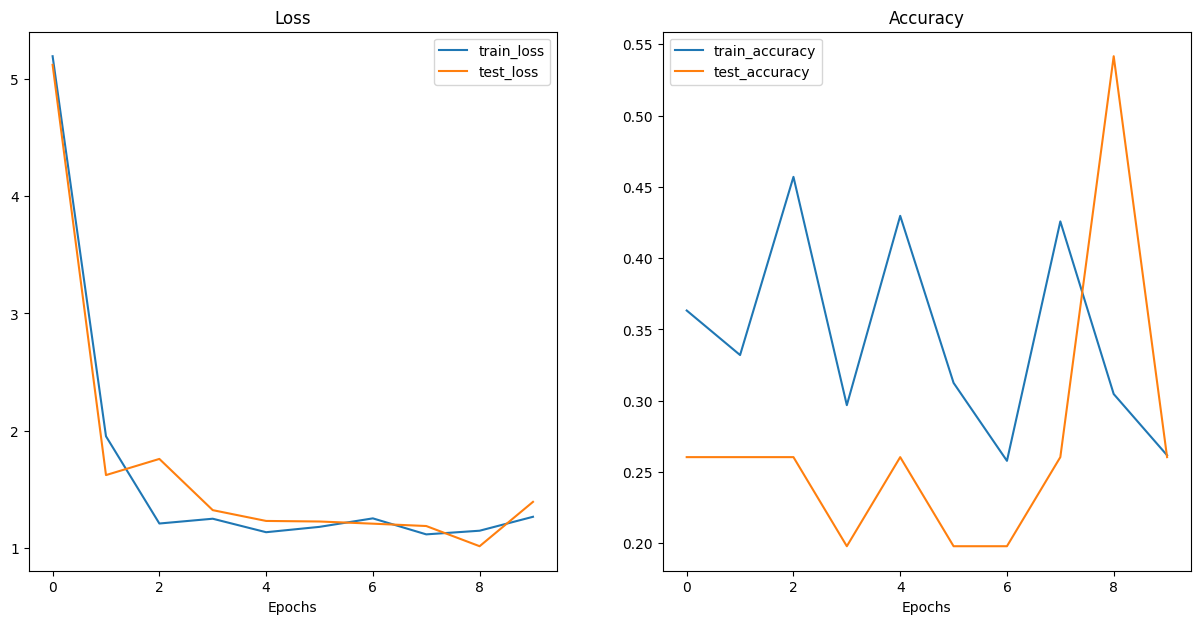

In [51]:
from helper_functions import plot_loss_curves

# Plot our ViT model's loss curves
plot_loss_curves(results)

Hmm, it looks like our model' loss curves are all over the place.

At least the loss looks like it's heading the right direction but the accuracy curves don't really show much promise.

These results are likely because of the difference in data resources and training regime of our ViT model versus the ViT paper.

It seems our model is severely underfitting (not achieving the results and we'd like it to).

How about we see if we can fix that by bringing in a pretrained ViT model?

##10.Using a pretrained ViT from `torchvision.models` on the same dataset


We've discused the benefits of using pretrained models in 0.6 PyTorch Transfer Learning.

But since we've now trained our own ViT from scratch and achieved less than optimal results, the benefits of transfer learning (using a pretrained model) really shine.



###10.1 Why use a pretrained model?

An important note on many mordern machinem learning research papers is that much of the results are obtained with large datasets and vast compute resources.

And in modern day machine learning, the original fully trained ViT would likely not be considered a "super large" training setup (models are continually getting bigger and bigger).

Reading the ViT paper section 4.2:

>Finally, the ViT/16 model pretrained on the public ImageNet-21k dataset performs well on most datasets too, while taking fewer resources to pre-train: it could be trained using a standard cloud TPUv3 with 8 cores in approximately 30 days.

Having a pretrained model available through resources like `torchvision.models`, the `timm (Torch Image Models) library`, the `Hugging Face Hub` or even from the authors of the papers themselves (there's a growing trend for machine learning researchers to release the code and pretrained models from their research papers, I'm a big fan of this trend, many of these resources can be found on `Paperswithcode.com`).

If you're focused on leveraging the benefits of a specific model architecture rather than creating your custom architecture, I'd highly recommend using a pretrained model.

###10.2 Getting a pretrained ViT model and creating a feature extractor.

We can get a pretrained ViT model from `torchvision.models`.

We'll go from the top by first making sure we've got the right versions of `torch` and `torchvision`.

In [52]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.5.0+cu121
0.20.0+cu121


In [53]:
# Set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

Finally, we'll get the pretrained ViT-Base with patch size 16 from the `torchvision.models` and prepare it for our FoodVision Mini use case by turning it into a feature extractor transfer learning model.

Specifically, we'll:

1. Get the pretrained weights for ViT-Base trained on ImageNet-1k from `torchvision.models.ViT_B_16_Weights.DEFAULT` (DEFAULT stand for best available).


2. Setup a ViT model instance via `torchvision.models.vit_b_16`, pass it the pretrained weights step 1 and send it to the target device.

3. Freeze all of the parameters in the base ViT model created in step 2 by setting their `requires_grad` attribute to `False`.

4. Update the classifier head of the ViT model created in step 2 to suit our own problem by changing the number of `out_features` to our number of classes (pizza, steak, sushi).

We covered steps like this in 0.6 PyTorch Transfer Learning section 3.2: Settig up a pretrained model and section 3.4: Freezing the base model and changing the output layer to suit our needs.

In [54]:
# 1. Get pretrained weights for ViT-Base
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

# 2. Setup a ViT model instance with pretrained weights
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

# 3. Freeze the base parameters
for parameter in pretrained_vit.parameters():
  parameter.requires_grad = False

# 4. Change the classifier head (set the seeds to ensure same initialization with the linear head )
set_seeds()

pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

pretrained_vit

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 128MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

Pretrained ViT feature extractor model created!

Let's now check it out by printing a `torchinfo.summary()`.

In [55]:
# Print a summary using torchinfo

summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 3]              768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

Notice how only the output layer is trainable, whereas all of the rest of the layers aew untrainable(frozen).

And the total number of parameters, 85,800,963, is the same as our custom made ViT model above.

But the number of trainable parameters for `pretrained_vit` is much, much lower than our custom `vit` at only 2,307 compared to 85,800,963 (in our custom `vit`, since we're training from strach, all parameters are trainable).

This means the pretrained model should train alot faster, we could potentially even use a larger batch size since less parameter updates are going to be taking up memory.

###10.3 Preparing data for the pretrained ViT model

We downloaded and created DataLoaders for our own ViT model back in section 2.

So we don't necessarily need to do it again.


But in the name of pratice, let's download some image data(pizza, steak and sushi images for FoodVision Mini), setup traine and test directories and then transform the images into tensors and DataLoaders.

We can download pizza, steak and sushi images from the course GitHub and the `download_data()` function we created in 07.PyTorch Experiment Tracking section 1.

In [56]:
from helper_functions import download_data

# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data/pizza_steak_sushi directory exists, skipping download.


PosixPath('data/pizza_steak_sushi')

And now we'll setup the training and test directory paths.

In [57]:
# setup train and test directory paths
train_dir = image_path/ "train"
test_dir = image_path/ "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Finally, we'll transform our images into tensors and turn them into DataLoaders.

Since we're using a pretrained model from `torchvision.models` we can call the `transforms()` method on it to get it's required transforms.

Remember, if you're going to use a pretrained model, it's generally important to **ensure your own custom data is transformed/formatted in the same way the data the original model was trained on**.

We covered this method of "automatic" transform creation in 06.PyTorch Transfer Learning section 2.2.

In [58]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()

print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


And now we've got transforms ready, we can turn our images into DataLoaders using the `data_setup.create_dataloaders()` method we've creeated in 05.PyTorch Going Modular section 2.

Since we're using a feature extractor model (less trainable parameters), we could increase the batch size to a higher value (if we set it to 1024, we'd be mimicking an improvement found in `Better plain ViT baselines for ImageNet-1k`, a paper which improves upon the orignal ViT paper and suggested extra reading). But since we only have ~200 training samples total, we'll stick with 32.

In [59]:
# Set dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32) # Could increase if we had more samples

###10.4 Train feature extractor ViT model

Feature extractor model ready, DateaLoaders ready, time to train!

As before we'll use the Adam optimizer (`torch.optim.Adam()`) with a learning rate of `1e-3` and `torch.nn.CrossEntropyLoss()` as the loss function.

Our `engine.train()` function we created in 05.PyTorch Going Modular section 4 will take care of the rest.

In [60]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)

loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()

pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.8333 | train_acc: 0.6484 | test_loss: 0.6476 | test_acc: 0.9072
Epoch: 2 | train_loss: 0.4814 | train_acc: 0.8867 | test_loss: 0.4171 | test_acc: 0.9384
Epoch: 3 | train_loss: 0.3158 | train_acc: 0.9414 | test_loss: 0.3284 | test_acc: 0.9384
Epoch: 4 | train_loss: 0.2510 | train_acc: 0.9531 | test_loss: 0.2648 | test_acc: 0.9688
Epoch: 5 | train_loss: 0.1998 | train_acc: 0.9531 | test_loss: 0.2421 | test_acc: 0.9384
Epoch: 6 | train_loss: 0.1812 | train_acc: 0.9609 | test_loss: 0.2161 | test_acc: 0.9384
Epoch: 7 | train_loss: 0.1670 | train_acc: 0.9609 | test_loss: 0.2154 | test_acc: 0.9384
Epoch: 8 | train_loss: 0.1422 | train_acc: 0.9648 | test_loss: 0.2146 | test_acc: 0.9384
Epoch: 9 | train_loss: 0.1879 | train_acc: 0.9766 | test_loss: 0.1890 | test_acc: 0.9384
Epoch: 10 | train_loss: 0.1341 | train_acc: 0.9570 | test_loss: 0.1774 | test_acc: 0.9583


###10.5 Plot feature extractor ViT model loss curves

Our pretrained ViT feature model numbers look good on the training and tests sets.

How do the loss curves look?

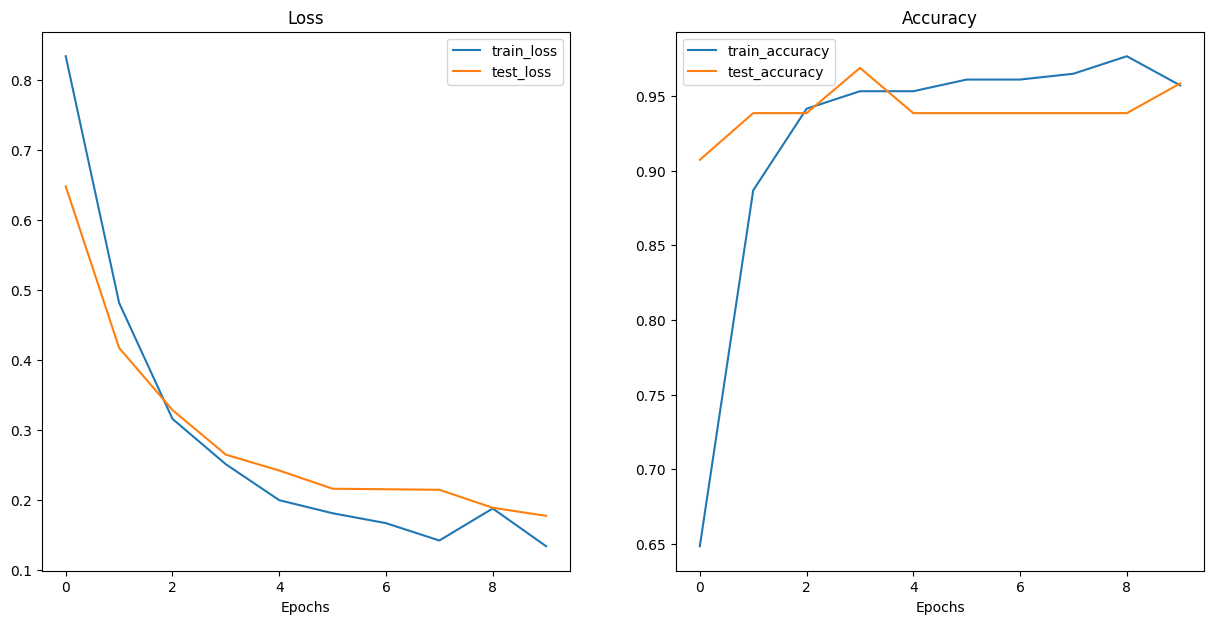

In [61]:
# PLot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

Woah!

Those are some close to textbook looking (really good) loss curves (check out 04.PyTorch Custom Datasets section 8 for what an ideal loss curve should look like).

That's the power of transfer learning!

We managed to get outstanding results with same model architecture, except our custom implementation was trained from scratch (worse performance) and this feature extractor model has the power of pretrained weights from ImageNet behind it.

What do you think?

Would our feature extractior model improve more if you kept training it?

###10.6 Save feature extractor ViT model and check file size


It looks like our ViT feature extractor model is performing quite well for our Food Vision Mini problem.

Perhaps we might want to try deploying it and see how it goes in production (in this case, deploying means putting our trained model in an application someone could use, say taking photos on their smartphone of food and seeing if our model thinks it's pizza, steak or sushi).

To do so we can first save our model with the `utils.save_model()` function we created in `05.PyTorch Going Modular section 5`.

In [64]:
# Save the model
from going_modular.going_modular import utils

utils.save_model(model=pretrained_vit,
           target_dir="models",
           model_name="08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth")

[INFO] Saving model to: models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth


And since we're thinking about deploying this model, it'd be good to know the size of it (in megabytes or MB).

Since we want our Food Vision Mini application to run fast, generally a smaller model with good performance will be better than a larger model with great performance.

We can check the size of our model in bytes using the `st_size` attribute of Python's `pathlib.Path().stat()` method whilst passing it our model's filepath name.

We can then scale the size in bytes to megabytes.

In [65]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size  = Path("models/08_pretrained_vit_feature_extractor_pizza_steak_sushi.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


Hmm, looks like our ViT feature extractor model for Food Vision Mini turned out to be about 327 MB in size.

How does this compare to the EffNetB2 feature extractor model in 07. PyTorch Experiment Tracking section 9?

>Note: The EffNetB2 model in reference was trained with 20% of pizza, steak and sushi data (double the amount of images) rather than the ViT feature extractor which was trained with 10% of pizza,steak and sushi data. AN exercise would be to train the ViT feature extractor model on the same amount of data and see how much the results improvee.

The EffNetB2 model (size 29 MB) is ~11x smaller than the ViT model with similar results for test,loss and accuracy.

However, the ViT model's results may improve more when trained with the same data (20% pizza, steak and sushi data).

But in terms of deployment, if we were comparing these two models, something we'd need to consider is whether the extra accuracy from the ViT model is worth the ~11x increase in model size?

Perhaps such a large model would take longer to load/run and wouldn't provide as good an experience as EffNetB2 which performs similarly but a t a much reduced size.

##11.Make predictions on a custom image

And finally, we'll finish with the utimate test, predicting on our own custom data.

Let's download the pizza dad image (a photo of my dad eating pizza) and use our ViT feature extractor to predict on it.

To do so, let's use the `pred_and_plot()` function we created in 06.PyTorch Transfer Learning section 6, for convenience, I saved this function to `going_modular.going_modular.predictions.py` on the course GitHub.

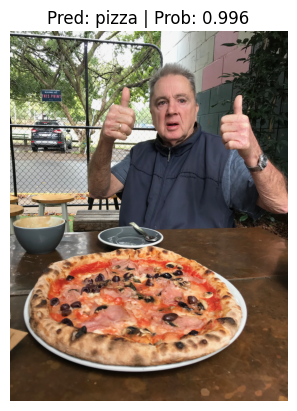

In [66]:
import requests

# Import function to make predictions on images and plot them
from going_modular.going_modular.predictions import pred_and_plot_image

# setup custom image path
custom_image_path = image_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't  already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from GitHub, need to use the "raw" file link
    request =  requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download.")

# Predict on custom image
pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)

Congratulations!

We've gone al the way from research paper to usable model code on our own custom images!